# Шаг 1. Загрузка данных

## 1.0 Импорт библиотек 

In [3]:
# Установка необходимых библиотек
!pip install shap
!pip install phik
!pip install --upgrade shap
!pip install numpy pandas
!pip install jupyter_contrib_nbextensions
!pip install --upgrade scikit-learn
!pip install ipywidgets

# Установка и активация расширений Jupyter
!jupyter contrib nbextension install --user
!jupyter nbextension enable toc2/main
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/jupyter_contrib_core/notebook_compat/nbextensions.py", line 6, in <module>
    from notebook.extensions import BaseExtensionApp
ModuleNotFoundError: No module named 'notebook.extensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/jupyter_contrib_core/notebook_compat/nbextensions.py", line 10, in <module>
    from notebook.nbextensions import BaseNBExtensionApp
ModuleNotFoundError: No module named 'notebook.nbextensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/bin/jupyter-contrib", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  Fi

In [4]:
# Импорты для работы с данными
import numpy as np
import pandas as pd

# Импорты для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Импорты для работы со статистикой
import scipy.stats as stats
from scipy import sparse as sp
from scipy.stats import shapiro

# Импорты для предобработки данных
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler

# Импорты для построения моделей
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Импорты для оценки моделей
from sklearn.metrics import classification_report, f1_score, make_scorer, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

# Импорты для кластеризации
from sklearn.cluster import KMeans

# Импорты для работы с SHAP
import shap

# Импорты для работы с корреляцией
from phik import report
from phik.report import plot_correlation_matrix

## 1.1 Загрузка данных

In [6]:
market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv', sep=',', decimal='.')
market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv', sep=',', decimal='.')
market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv', sep=',', decimal='.')
money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')

market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

## 1.2 Проверка соответствия данных описанию

### Проверка таблицы market_file

Просматриваем общую информацию о каждой таблице 

In [11]:
display("Информация о таблице market_file:")
display(market_file)
display("\n")
display("Первые 5 строк таблицы market_file:")
display(market_file.head())

'Информация о таблице market_file:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


'\n'

'Первые 5 строк таблицы market_file:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Нужно поменять тип данных в столбах "Маркет_актив_6_мес" и "Акционные_покупки" на float64.

### Проверка таблицы market_money

In [14]:
# Проверка таблицы market_time
display("Информация о таблице market_money:")
display(market_money)
display("\n")
display("Первые 5 строк таблицы market_money:")
display(market_money.head())

'Информация о таблице market_money:'

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


'\n'

'Первые 5 строк таблицы market_money:'

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Нужно поменять тип данных в столбе "Выручка" на float64

### Проверка таблицы market_time

In [17]:
# Проверка таблицы market_time
display("Информация о таблице market_time:")
display(market_time)
display("\n")
display("Первые 5 строк таблицы market_time:")
display(market_time.head())

'Информация о таблице market_time:'

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


'\n'

'Первые 5 строк таблицы market_time:'

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


### Проверка таблицы money

In [19]:
# Проверка таблицы money
display("Информация о таблице money:")
display(money)
display("\n")
display("Первые 5 строк таблицы money:")
display(money.head())

'Информация о таблице money:'

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


'\n'

'Первые 5 строк таблицы money:'

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Общий этог по разелу: Необходимо выполнить преобразование типа данных для столбца "Выручка" в float64, а также для столбцов "Маркет_актив_6_мес" и "Акционные_покупки", тоже конвертировать их в формат float64.

## Шаг 2. Предобработка данных

### Преобразование столбцов в числовой тип данных

Преобразуем типы данных столбцов 'Маркет_актив_6_мес' и 'Акционные_покупки' в таблице market_file и 'Выручка' в таблице market_money в числовой формат, игнорируя ошибочные значения, а затем выводим обновленную информацию о таблицах.

In [24]:
# Преобразование столбцов в числовой тип данных
market_file['Маркет_актив_6_мес'] = pd.to_numeric(market_file['Маркет_актив_6_мес'], errors='coerce')
market_file['Акционные_покупки'] = pd.to_numeric(market_file['Акционные_покупки'], errors='coerce')
display("Информация о таблице market_file после преобразования типов данных:")
display(market_file)

'Информация о таблице market_file после преобразования типов данных:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [25]:
market_money['Выручка'] = pd.to_numeric(market_money['Выручка'], errors='coerce')
# Проверка таблицы market_money после преобразования типов данных
display("Информация о таблице ma)rket_money после преобразования типов данных:")
display(market_money)

'Информация о таблице ma)rket_money после преобразования типов данных:'

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


### Обработка дубликатов

Посчитаем дубликаты

In [28]:
display("Дубликаты в market_file:")
display(market_file.duplicated().sum())
display("Дубликаты в market_money:")
display(market_money.duplicated().sum())
display("Дубликаты в market_time:")
display(market_time.duplicated().sum())
display("Дубликаты в money:")
display(money.duplicated().sum())

'Дубликаты в market_file:'

0

'Дубликаты в market_money:'

0

'Дубликаты в market_time:'

0

'Дубликаты в money:'

0

In [29]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

In [30]:
#Для market_file
print("Уникальные значения в market_file:")
categorical_cols = market_file.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Уникальные значения для '{col}':")
    print(market_file[col].value_counts())
    print("-"*30)

Уникальные значения в market_file:
Уникальные значения для 'Покупательская активность':
Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64
------------------------------
Уникальные значения для 'Тип сервиса':
Тип сервиса
стандарт    924
премиум     376
Name: count, dtype: int64
------------------------------
Уникальные значения для 'Разрешить сообщать':
Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64
------------------------------
Уникальные значения для 'Популярная_категория':
Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64
------------------------------


In [31]:
#Для market_money

print("Уникальные значения в market_money:")
categorical_cols = market_money.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Уникальные значения для '{col}':")
    print(market_money[col].value_counts())
    print("-"*30)

Уникальные значения в market_money:
Уникальные значения для 'Период':
Период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64
------------------------------


In [32]:
#Для market_time

print("Уникальные значения в market_time:")
categorical_cols = market_time.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Уникальные значения для '{col}':")
    print(market_time[col].value_counts())
    print("-"*30)

Уникальные значения в market_time:
Уникальные значения для 'Период':
Период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64
------------------------------


#Для money (нет категориальных признаков)

Мы преобразовали типы данных столбцов 'Маркет_актив_6_мес' и 'Акционные_покупки' в таблице market_file и 'Выручка' в таблице market_money в числовой формат, игнорируя ошибочные значения, а затем выводим обновленную информацию о таблицах. И увидели что количество дубликатов во всех таблицах ровна 0.
Вывод по разделу: Теперь данные готовы к иследованию.

Исключены неявных дубликатов в категориальных признаках

# Шаг 3. Исследовательский анализ данных

Сравним столбец 'Период' в таблицах market_money и market_time

Проведите исследовательский анализ данных из каждой таблицы.

In [39]:
# Имена таблиц берутся непосредственно из названий файлов
table_names = ['market_file', 'market_money', 'market_time', 'money']

# Список таблиц
tables = [market_file, market_money, market_time, money]

# Итерация по таблицам и их названиям
for table, name in zip(tables, table_names):
    print(f"Статистический анализ для таблицы {name}:")
    display(table[table.select_dtypes(include=['float64', 'int64']).columns].describe())

Статистический анализ для таблицы market_file:


,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Статистический анализ для таблицы market_money:


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Статистический анализ для таблицы market_time:


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Статистический анализ для таблицы money:


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


In [40]:
market_money = market_money[market_money['Выручка'] <= 15000]
len(market_money[market_money['Выручка'] > 15000])
market_money.describe()

,id,Выручка
count,3899.000000,3899.00000
mean,215997.658374,4999.57743
std,375.243472,706.99988
min,215348.000000,0.00000
25%,215673.000000,4590.10000
50%,215998.000000,4957.00000
75%,216322.500000,5363.00000
max,216647.000000,7799.40000


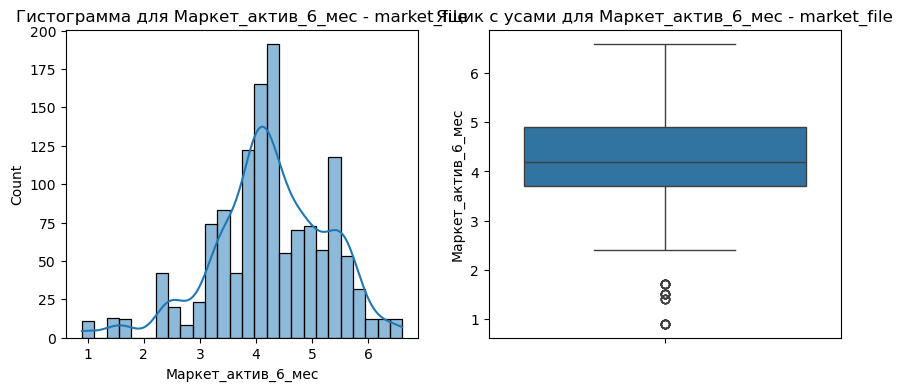

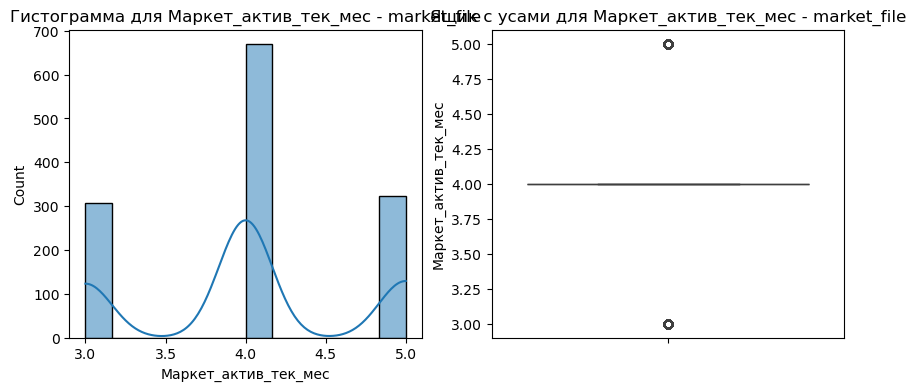

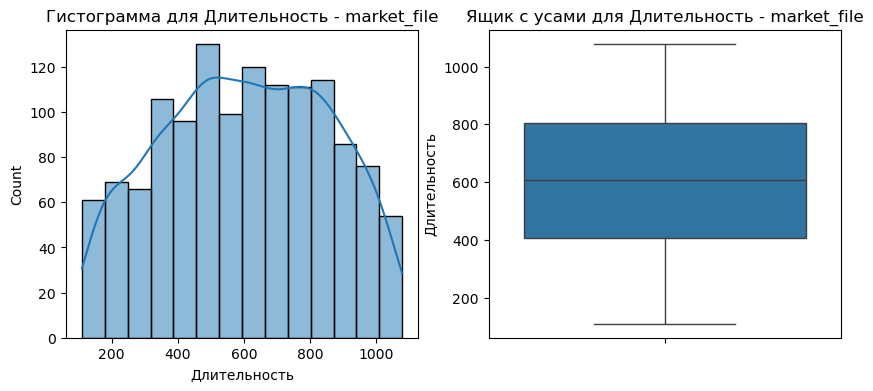

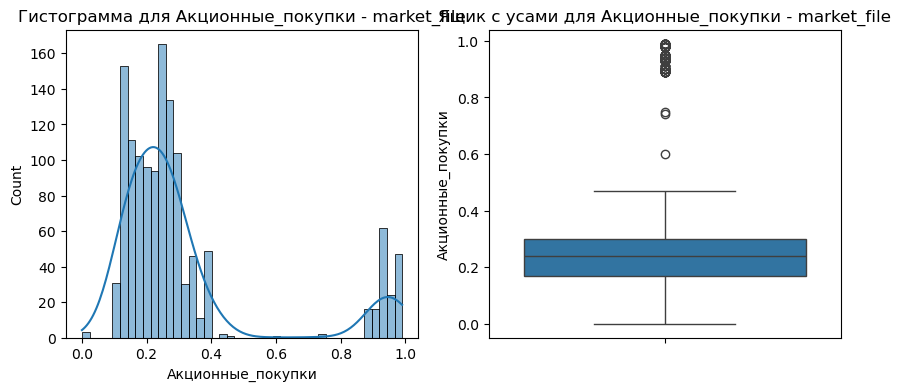

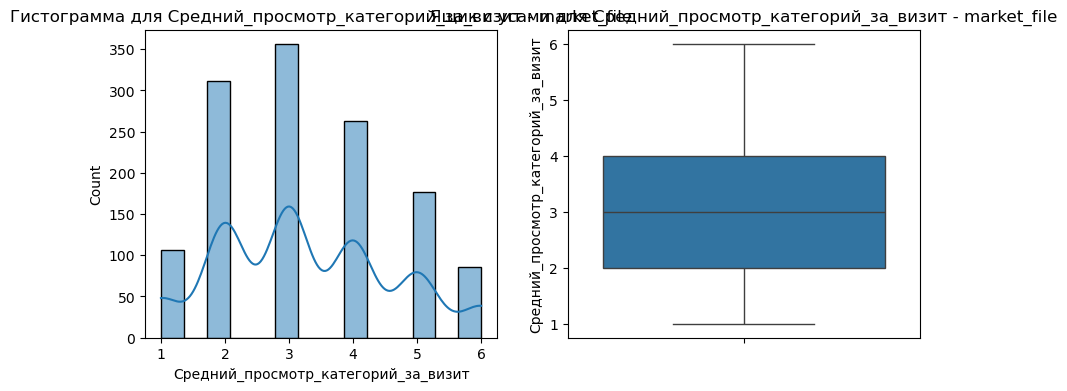

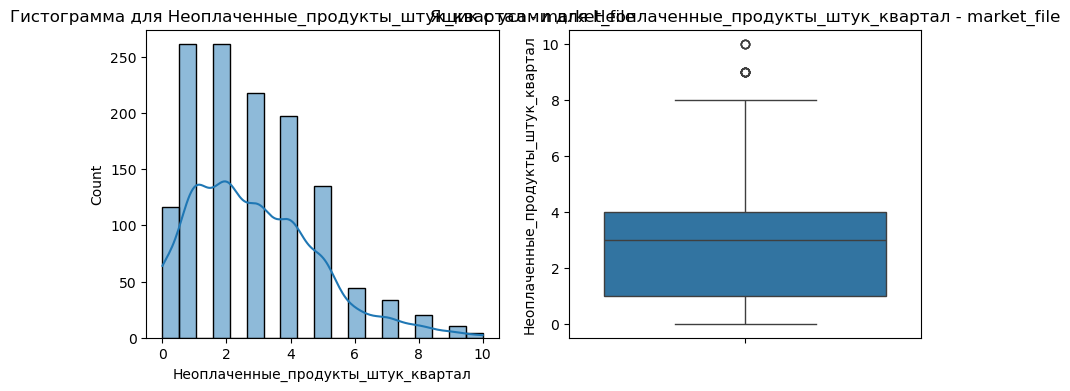

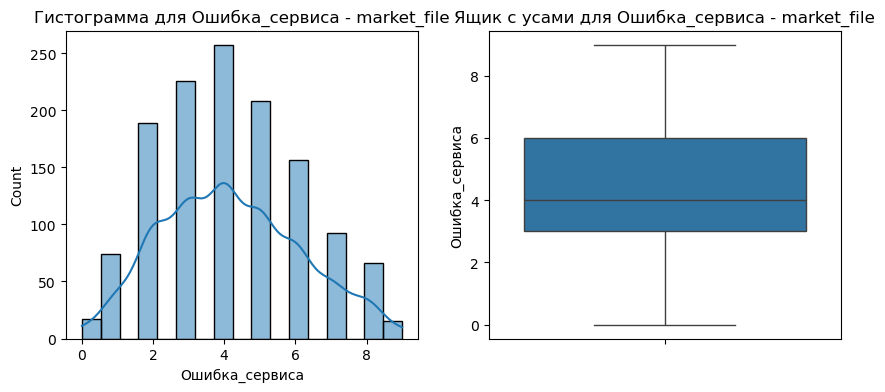

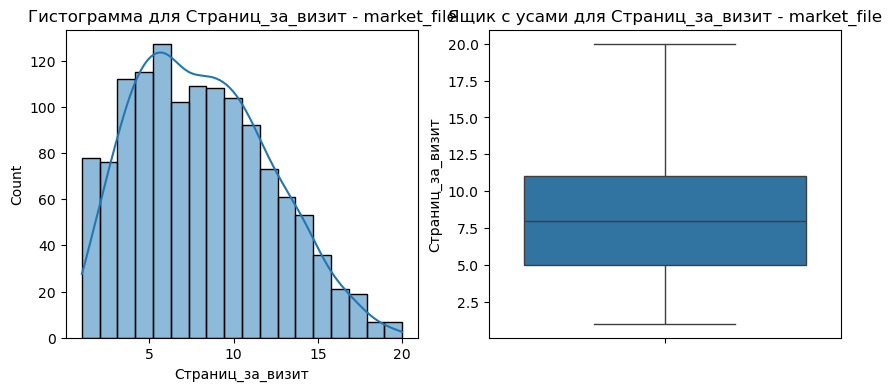

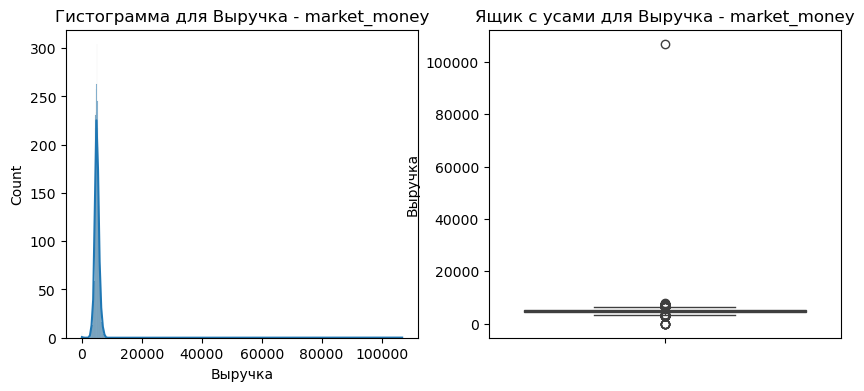

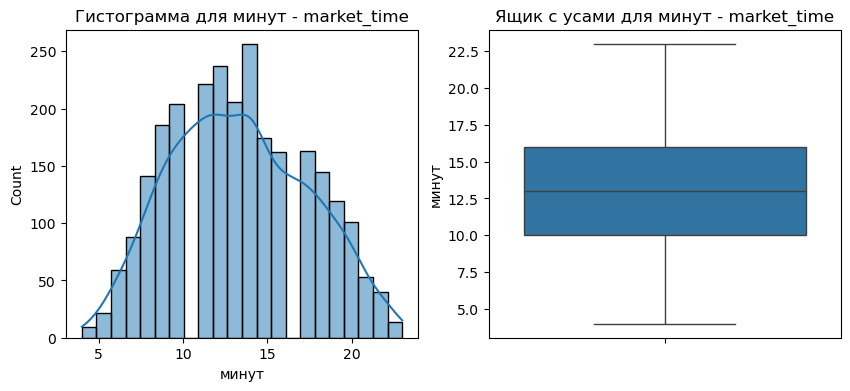

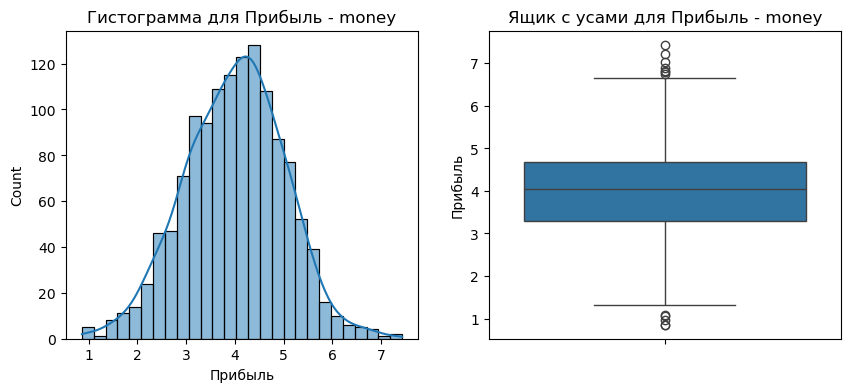

In [41]:
# Создание гистограмм и ящиков с усами для каждой таблицы
for table, name in zip(tables, table_names):
    # Выбор количественных данных из таблицы, исключая ID
    quantitative_data = table.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], errors='ignore')  # предположим, что ID колонка называется 'id'
    
    # Гистограммы для каждого количественного столбца
    for column in quantitative_data:
        plt.figure(figsize=(10, 4))
        
        # Гистограмма
        plt.subplot(1, 2, 1)
        sns.histplot(quantitative_data[column], kde=True)
        plt.title(f'Гистограмма для {column} - {name}')
        
        # Ящик с усами
        plt.subplot(1, 2, 2)
        sns.boxplot(y=quantitative_data[column])
        plt.title(f'Ящик с усами для {column} - {name}')
        
        # Показать графики
        plt.show()

В файле marketfile асимметричные данные в столбце "Акционныепокупки" с медианой в 0,24 и выбросами свыше 0,8. "Неоплаченныепродуктыштукквартал" таже искажены в большую сторону, с максимумом до 10 единиц. В файле marketmoney распределение "Выручки" сильно смещено вправо с экстремально высоким максимумом. Выбросы по выручке были очищены.

In [43]:
market_file['охотник_за_акциями'] = market_file['Акционные_покупки'].apply(lambda x: 'да' if x > 0.8 else 'нет')

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


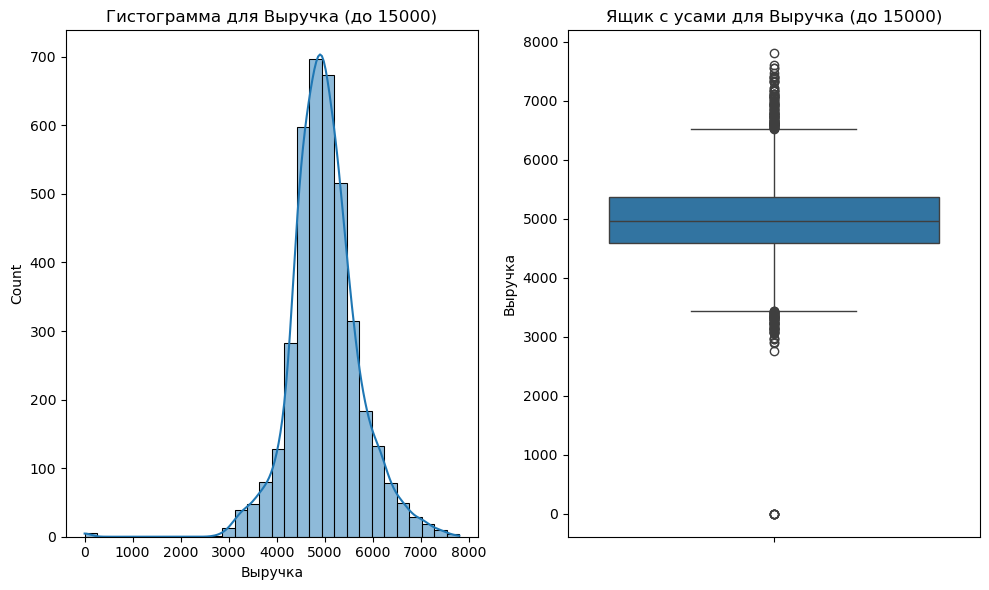

In [44]:
# Ограничить выборку значений до 15000
market_money = market_money[market_money['Выручка'] <= 15000]

# Создать гистограмму
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(market_money['Выручка'], kde=True, bins=30)
plt.title('Гистограмма для Выручка (до 15000)')
plt.xlabel('Выручка')

# Создать ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(y=market_money['Выручка'], orient='h')
plt.title('Ящик с усами для Выручка (до 15000)')

plt.tight_layout()
plt.show()

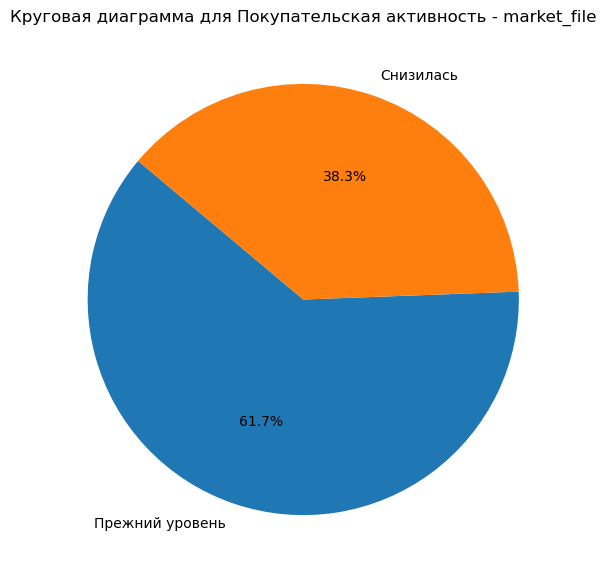

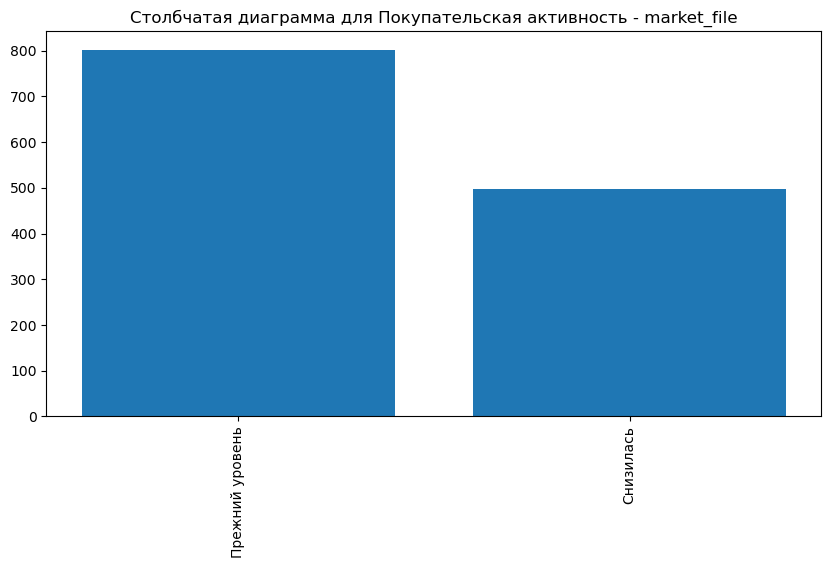

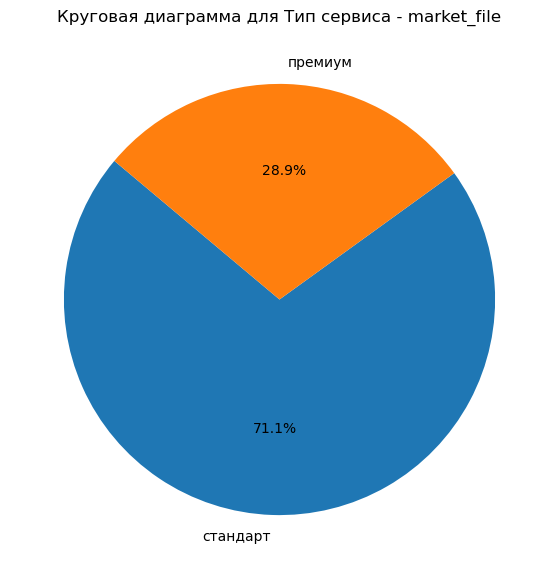

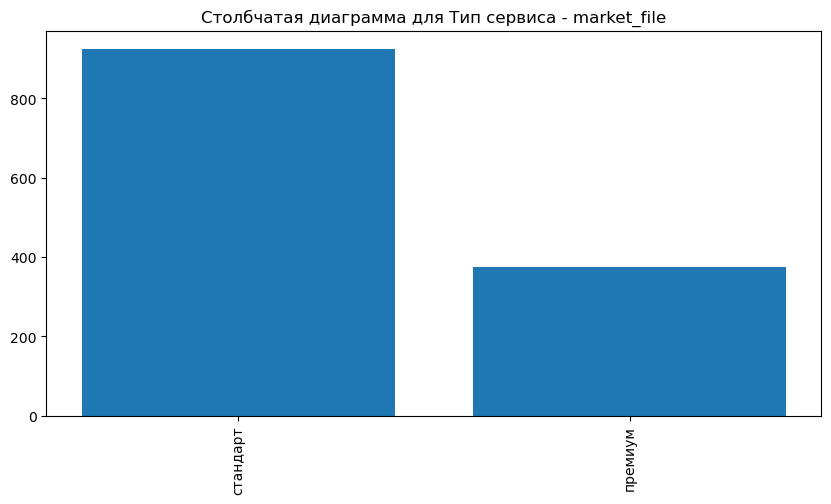

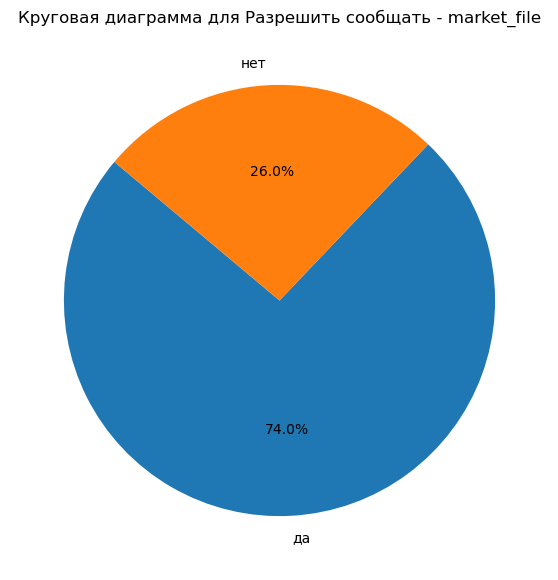

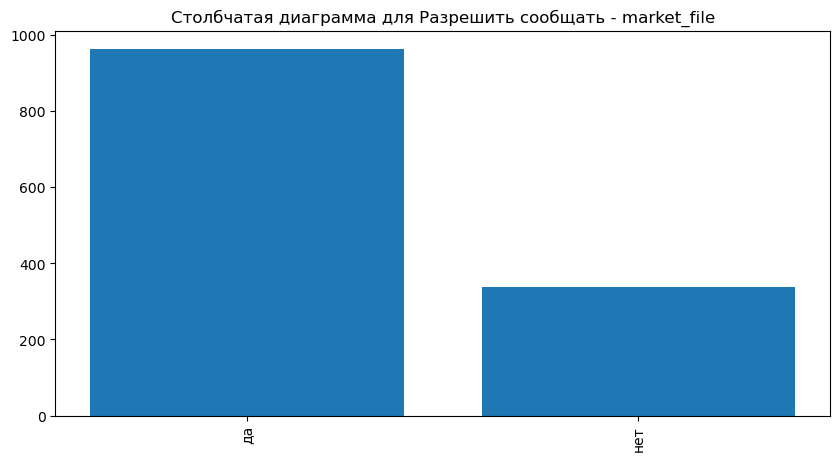

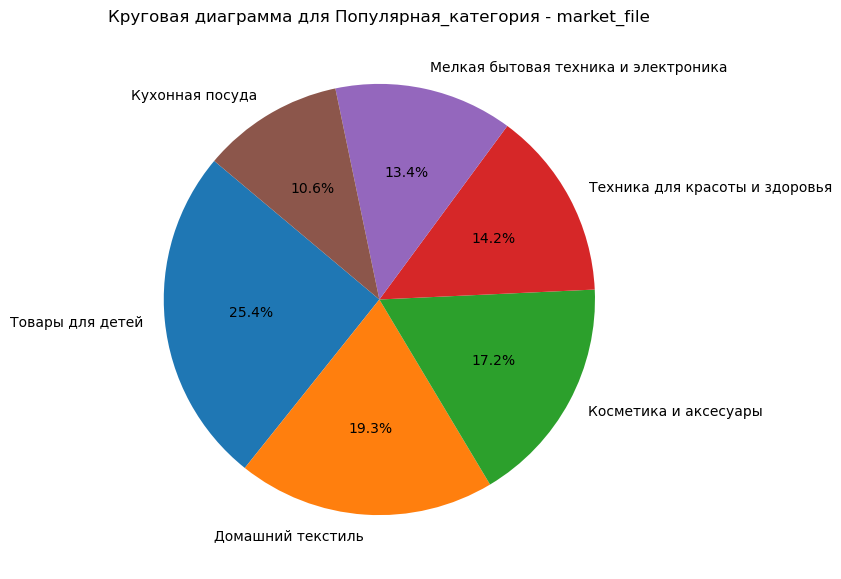

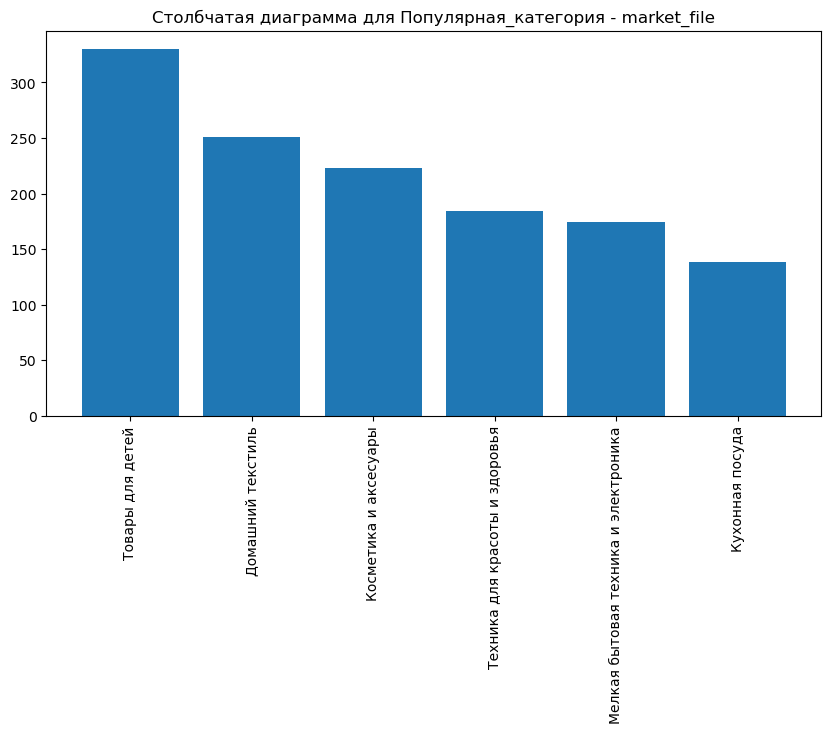

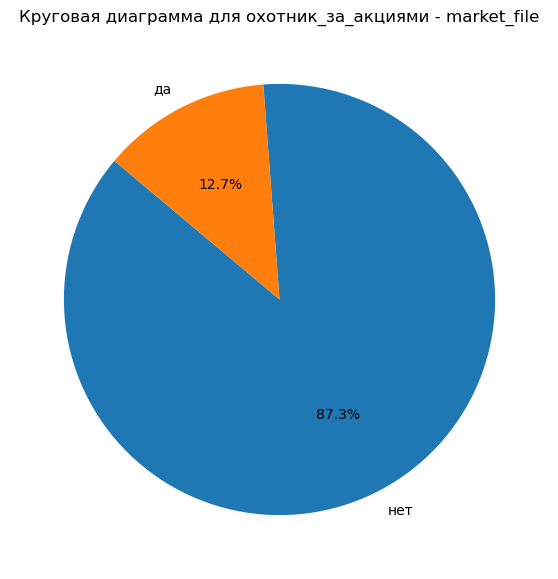

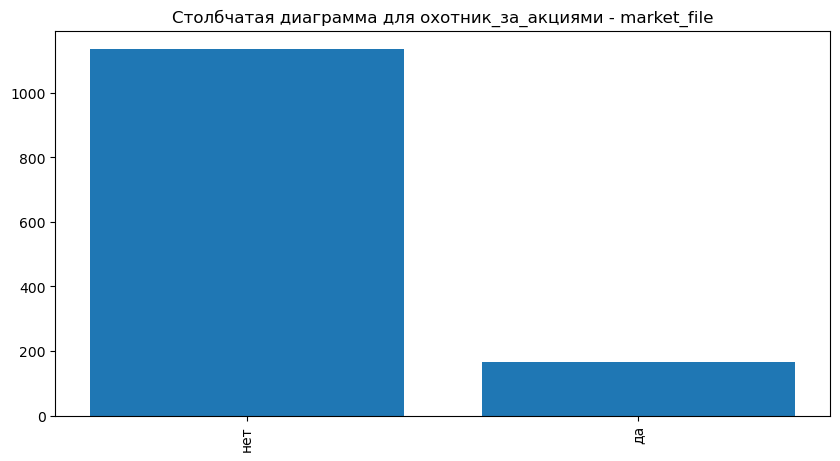

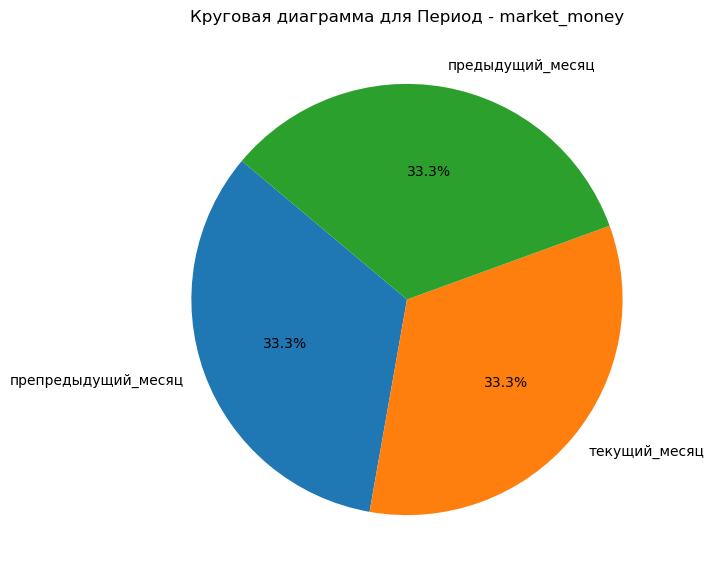

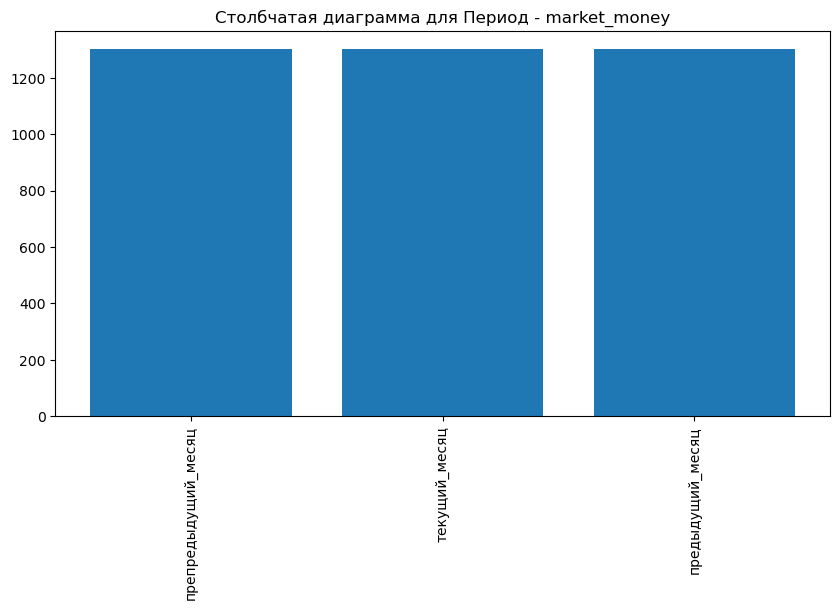

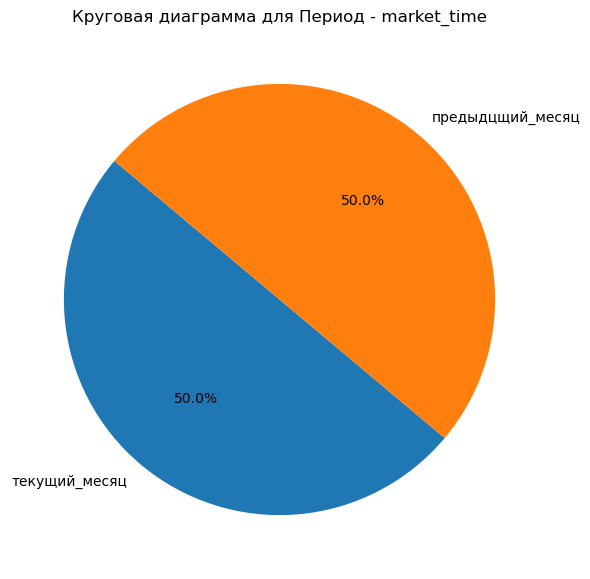

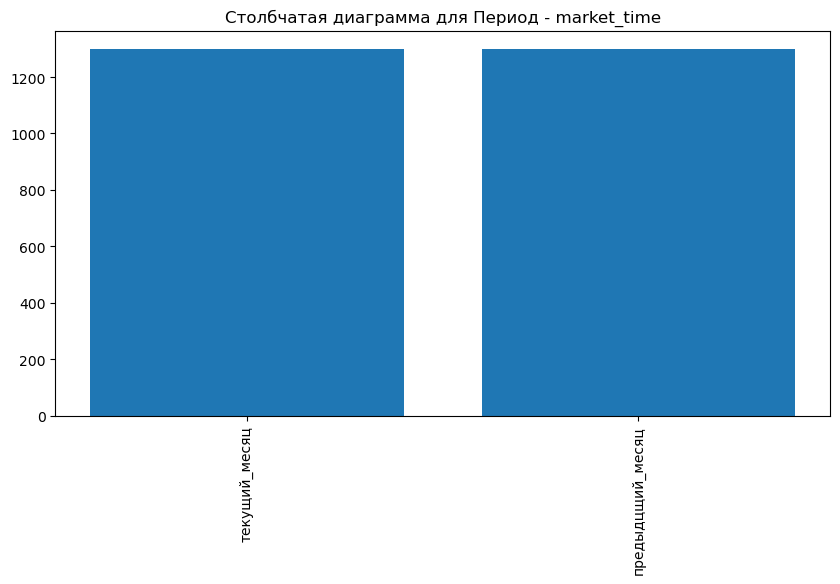

In [45]:
# Для каждой таблицы в списке анализируем категориальные данные
for table, name in zip(tables, table_names):
    # Выбор категориальных данных из таблицы
    categorical_data = table.select_dtypes(include=['object', 'category'])
    
    for column in categorical_data.columns:
        # Считаем количество уникальных значений для категориального столбца
        value_counts = categorical_data[column].value_counts()
        
        # Круговая диаграмма
        plt.figure(figsize=(7, 7))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Круговая диаграмма для {column} - {name}')
        plt.show()
        
        # Столбчатая диаграмма
        plt.figure(figsize=(10, 5))
        plt.bar(value_counts.index, value_counts)
        plt.title(f'Столбчатая диаграмма для {column} - {name}')
        plt.xticks(rotation=90)  # Поворот названий категорий, если они слишком длинные
        plt.show()

Проверка нормальности распределения для Маркет_актив_6_мес в таблице market_file:
Тест Шапиро-Уилка: статистика=0.97795415572858, p-value=3.3465563797619124e-13
Тест Колмогорова-Смирнова: статистика=0.08138523051217411, p-value=6.145582127667131e-08


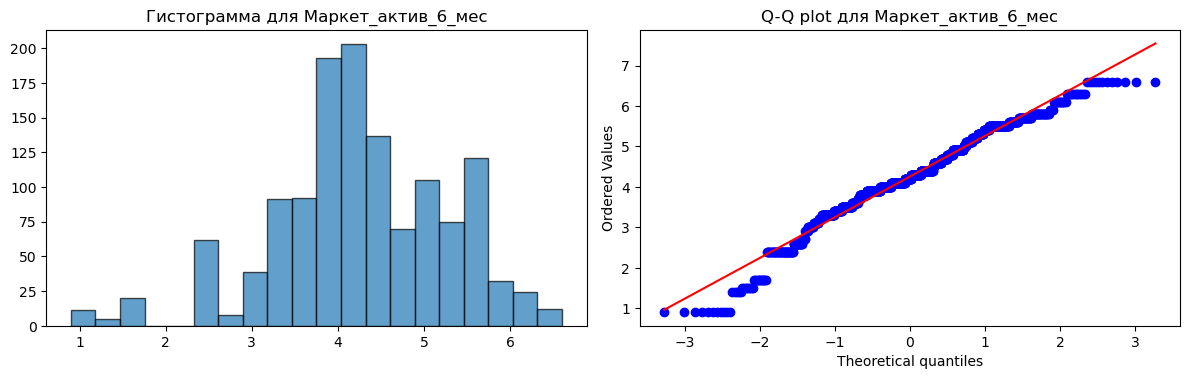

Проверка нормальности распределения для Маркет_актив_тек_мес в таблице market_file:
Тест Шапиро-Уилка: статистика=0.8059887843106124, p-value=7.390260781667778e-37
Тест Колмогорова-Смирнова: статистика=0.25814368620980405, p-value=6.8667300405435566e-77


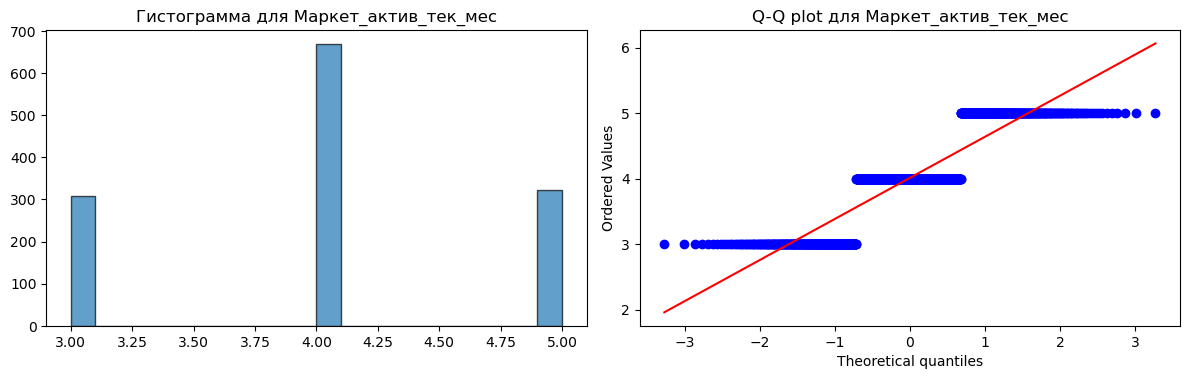

Проверка нормальности распределения для Длительность в таблице market_file:
Тест Шапиро-Уилка: статистика=0.972698708824484, p-value=5.787651462272261e-15
Тест Колмогорова-Смирнова: статистика=0.04998397055108972, p-value=0.002913117913216822


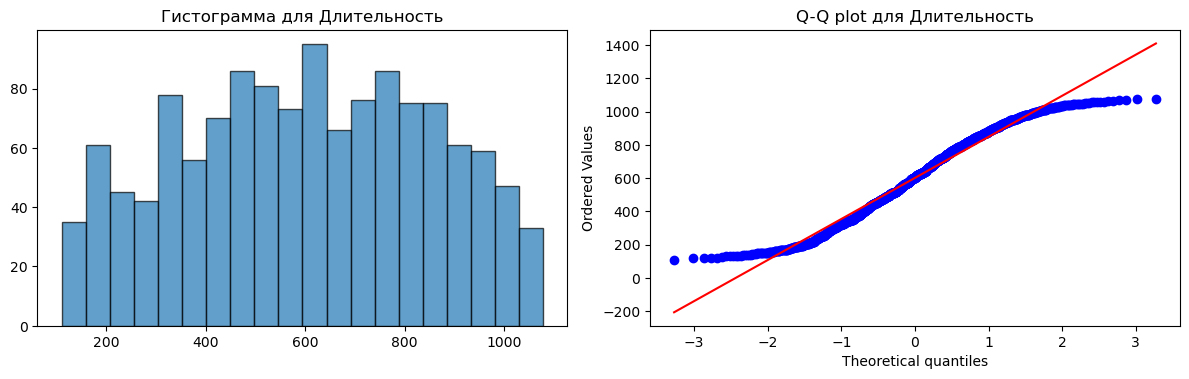

Проверка нормальности распределения для Акционные_покупки в таблице market_file:
Тест Шапиро-Уилка: статистика=0.6621251158618414, p-value=6.185281606977211e-45
Тест Колмогорова-Смирнова: статистика=0.2954414008010333, p-value=4.61696328027582e-101


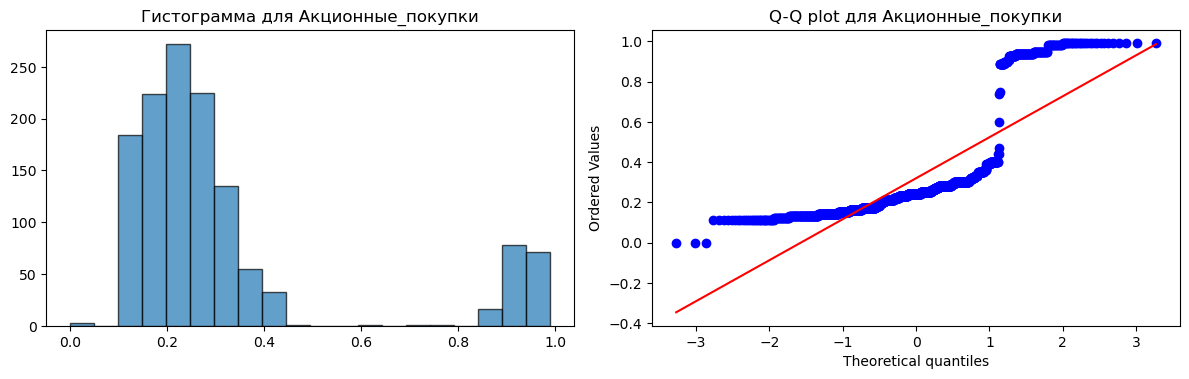

Проверка нормальности распределения для Средний_просмотр_категорий_за_визит в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9306024431610741, p-value=4.3522844141663915e-24
Тест Колмогорова-Смирнова: статистика=0.1743355657212987, p-value=5.032826929517427e-35


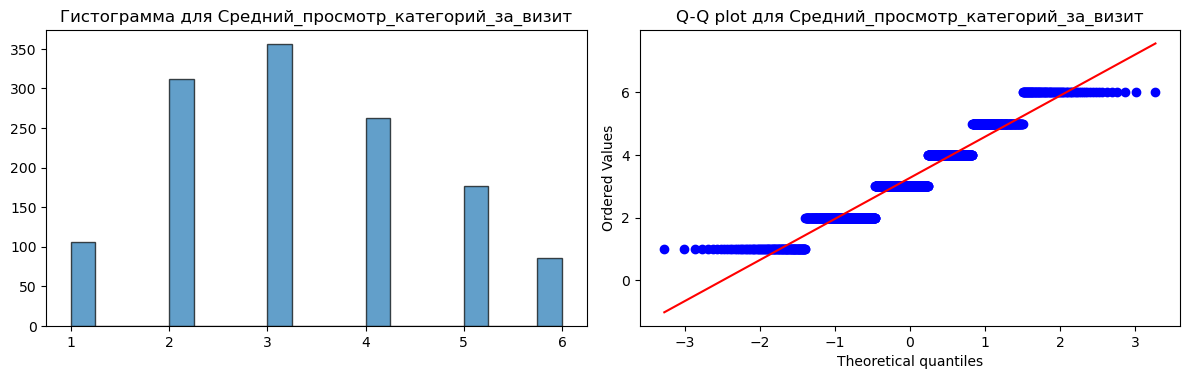

Проверка нормальности распределения для Неоплаченные_продукты_штук_квартал в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9328863280801185, p-value=1.0150092614851186e-23
Тест Колмогорова-Смирнова: статистика=0.15574519400157777, p-value=5.26113630052841e-28


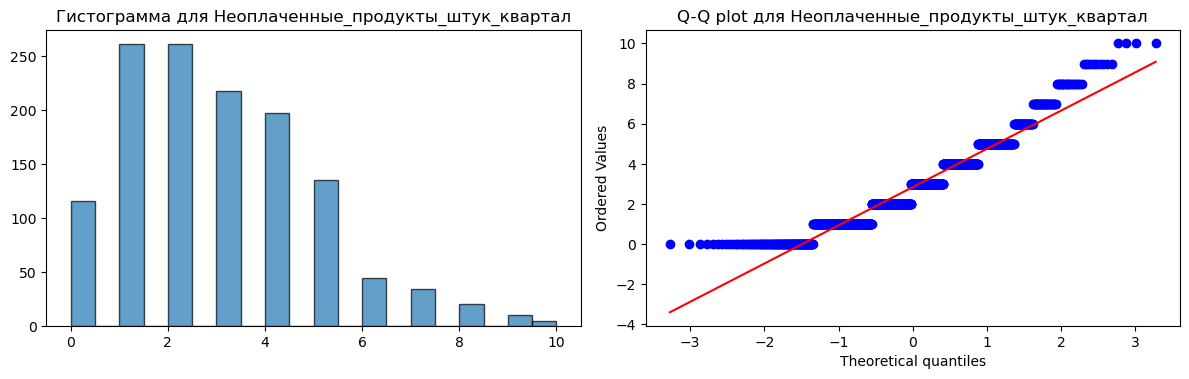

Проверка нормальности распределения для Ошибка_сервиса в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9658734202233539, p-value=6.207569190860348e-17
Тест Колмогорова-Смирнова: статистика=0.1246907832044245, p-value=4.4728421702525785e-18


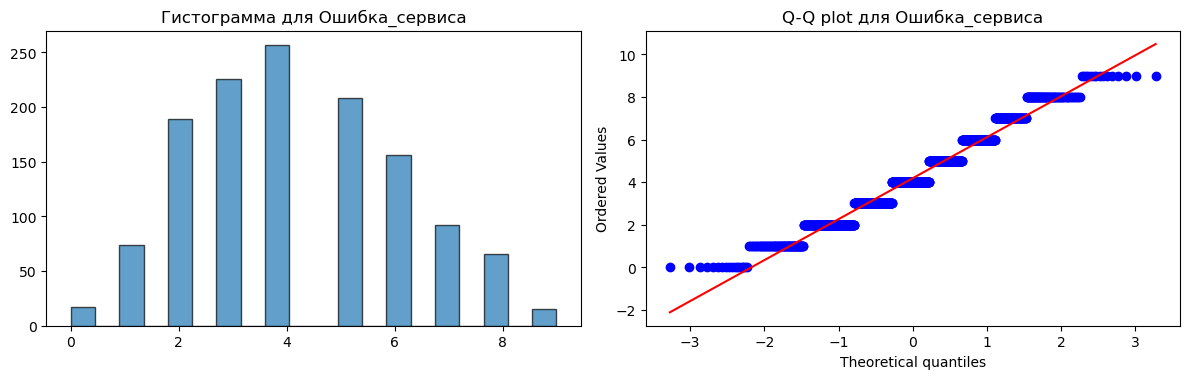

Проверка нормальности распределения для Страниц_за_визит в таблице market_file:
Тест Шапиро-Уилка: статистика=0.9737673434573806, p-value=1.261430117529227e-14
Тест Колмогорова-Смирнова: статистика=0.09865654813495062, p-value=1.8200166138794207e-11


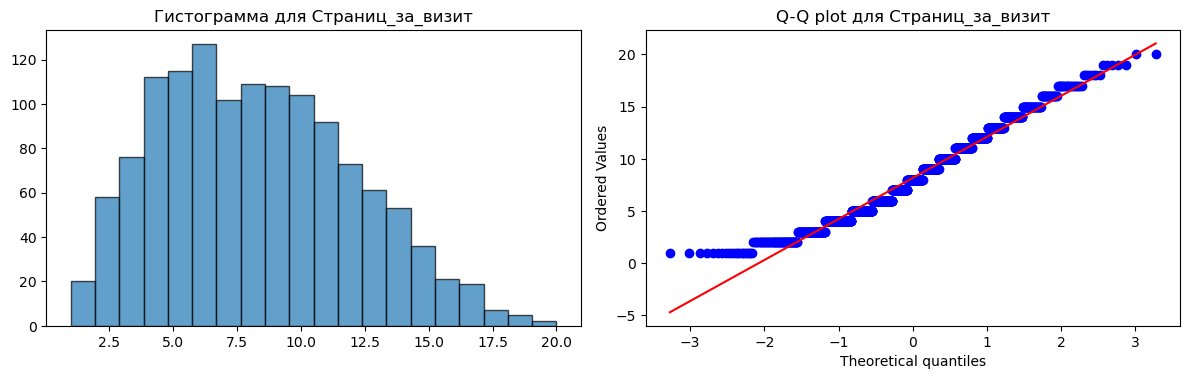

Проверка нормальности распределения для Выручка в таблице market_money:
Тест Шапиро-Уилка: статистика=0.19781193409123943, p-value=2.372755445938205e-84
Тест Колмогорова-Смирнова: статистика=0.23754306762651872, p-value=4.217375775521322e-194


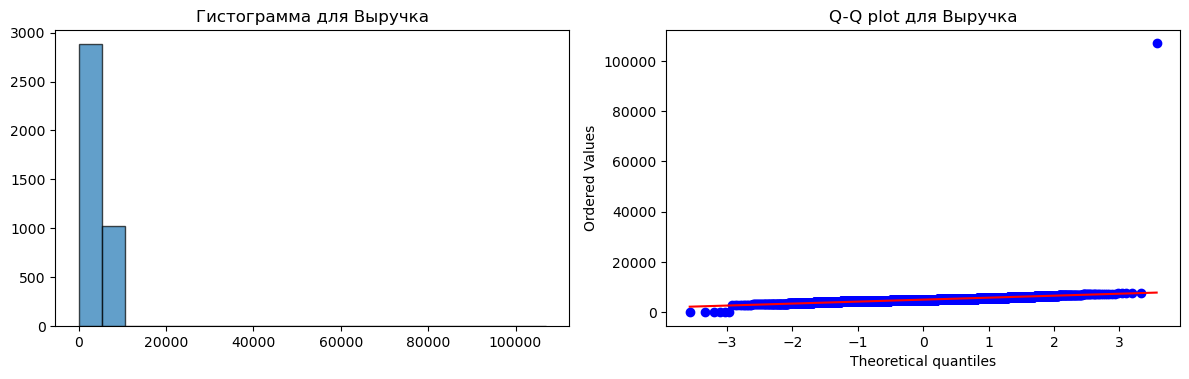

Проверка нормальности распределения для минут в таблице market_time:
Тест Шапиро-Уилка: статистика=0.9825905749365752, p-value=2.5175899876655113e-17
Тест Колмогорова-Смирнова: статистика=0.0771909836483099, p-value=6.393956907692867e-14


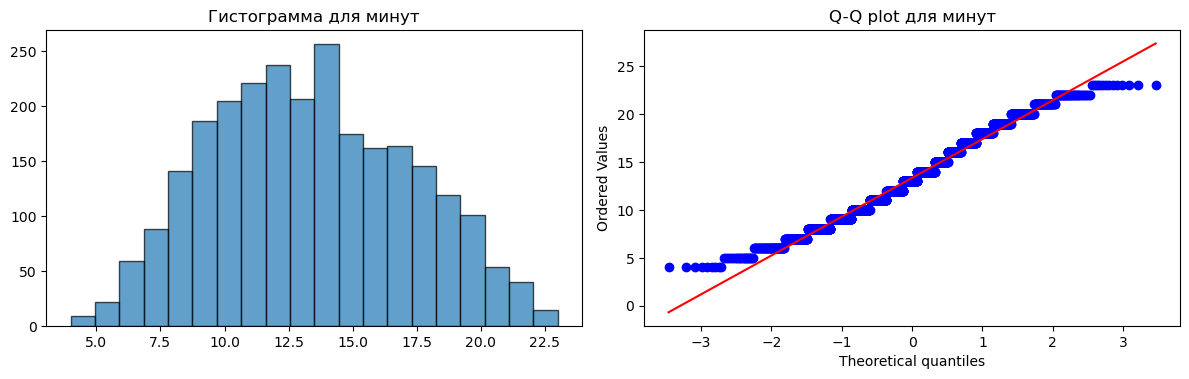

Проверка нормальности распределения для Прибыль в таблице money:
Тест Шапиро-Уилка: статистика=0.998382262971157, p-value=0.25828300804368703
Тест Колмогорова-Смирнова: статистика=0.02452273296902474, p-value=0.4084233707877136


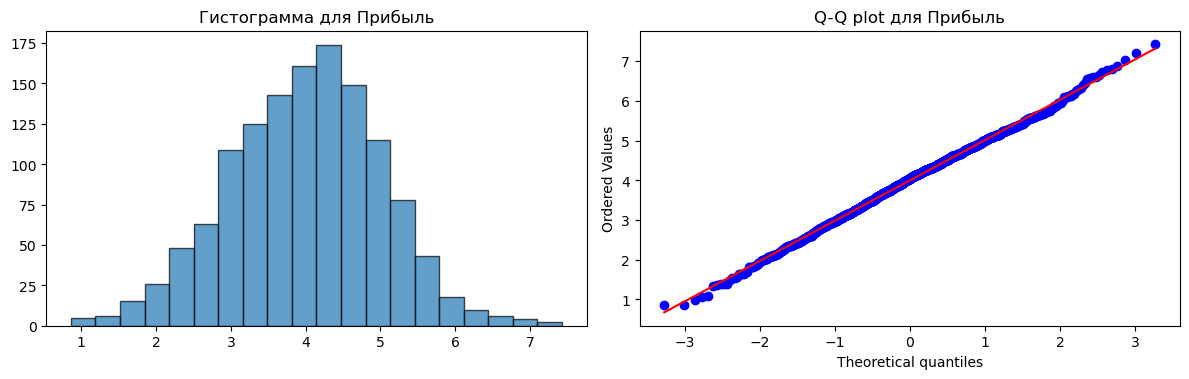

In [46]:
# Перебираем таблицы для анализа количественных данных
for table, name in zip(tables, table_names):
    quantitative_data = table.select_dtypes(include=['float64', 'int64'])
    
    # Исключаем столбец 'id' из анализа
    quantitative_data = quantitative_data.drop(columns=['id'], errors='ignore')
    
    for column in quantitative_data.columns:
        # Печать названия текущего столбца
        print(f"Проверка нормальности распределения для {column} в таблице {name}:")

        # График гистограммы
        plt.figure(figsize=(12, 7))
        plt.subplot(2, 2, 1)
        plt.title(f"Гистограмма для {column}")
        plt.hist(quantitative_data[column], bins=20, edgecolor='k', alpha=0.7)

        # Q-Q plot
        plt.subplot(2, 2, 2)
        stats.probplot(quantitative_data[column].dropna(), dist="norm", plot=plt)
        plt.title(f"Q-Q plot для {column}")

        # Тест Шапиро-Уилка
        shapiro_test = stats.shapiro(quantitative_data[column].dropna())
        # Тест Колмогорова-Смирнова
        ks_test = stats.kstest(quantitative_data[column].dropna(), 'norm', args=(quantitative_data[column].mean(), quantitative_data[column].std()))

        # Вывод результатов тестов на нормальность
        print(f"Тест Шапиро-Уилка: статистика={shapiro_test[0]}, p-value={shapiro_test[1]}")
        print(f"Тест Колмогорова-Смирнова: статистика={ks_test[0]}, p-value={ks_test[1]}")

        # Показать графики
        plt.tight_layout()
        plt.show()

Для большинства признаков p-value в тестах Шапиро-Уилка и Колмогорова-Смирнова очень мало (меньше 0.05), что свидетельствует об отклонении от нормального распределения. Исключением является столбец "Прибыль" в таблице money, где p-value больше 0.05, что указывает на возможность нормального распределения.

In [48]:
display(market_money['Период'].value_counts())
display(market_time['Период'].value_counts())
len(market_money['id'].unique())

Период
препредыдущий_месяц    1300
предыдущий_месяц       1300
текущий_месяц          1299
Name: count, dtype: int64

Период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64

1300

Найдем количество клиентов с покупательской активностью не менее трёх месяцев

In [50]:
# Показать id из market_money, где Период = 'предыдцщий_месяц'
previous_month_ids = market_money[market_money['Период'] == 'предыдущий_месяц']['id']
display(f"Количество клиентов с покупательской активностью не менее трёх месяцев: {len(previous_month_ids)}")

'Количество клиентов с покупательской активностью не менее трёх месяцев: 1300'

In [51]:
# Преобразуем столбец 'Период' в категориальный тип данных
market_money['Период'] = pd.Categorical(market_money['Период'], categories=['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц'])

# Разбиваем DataFrame по периодам
market_money_by_period = market_money.pivot(index='id', columns='Период', values='Выручка')

# Заполняем пропущенные значения нулями
market_money_by_period = market_money_by_period.fillna(0)

# Создаем маску для пользователей с выручкой хотя бы в одном из трех месяцев
mask = ((market_money_by_period['текущий_месяц'] > 0) & 
        (market_money_by_period['предыдущий_месяц'] > 0) & 
        (market_money_by_period['препредыдущий_месяц'] > 0))

# Получаем id пользователей, удовлетворяющих условию
user_ids_to_keep = market_money_by_period[mask].index

# Выводим количество оставшихся пользователей
print(f"Количество клиентов с покупательской активностью во всех трёх месяцах: {len(user_ids_to_keep)}")
display(market_money)
display(user_ids_to_keep)

Количество клиентов с покупательской активностью во всех трёх месяцах: 1296


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


Index([215349, 215350, 215351, 215352, 215353, 215354, 215355, 215356, 215358,
       215360,
       ...
       216638, 216639, 216640, 216641, 216642, 216643, 216644, 216645, 216646,
       216647],
      dtype='int64', name='id', length=1296)

In [52]:
# Получаем все уникальные id из market_money
all_user_ids = market_money['id'].unique()

# Находим id, которые не вошли в user_ids_to_keep
user_ids_to_remove = np.setdiff1d(all_user_ids, user_ids_to_keep)

# Выводим количество удаленных пользователей
print(f"Количество пользователей, удаленных из-за отсутствия активности: {len(user_ids_to_remove)}")

Количество пользователей, удаленных из-за отсутствия активности: 4


Не потребовалось удалять пользователей, так как у всех были покупки в каждом из трех месяцев.

Найдем длину списка previous month ids, для проверки

In [55]:
# Длина списка previous_time_ids
length_of_previous_time_ids = len(previous_month_ids)

# Вывод длины списка
display(f"Количество элементов в списке previous_time_ids: {length_of_previous_time_ids}")

'Количество элементов в списке previous_time_ids: 1300'

Общий вывод:Количество клиентов с покупательской активностью не менее трёх месяцев: 1300

# Шаг 4. Объединение таблиц

## 4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 

Еще раз посмотрим на таблицы которые будем объединять

In [60]:
display(market_file)
display(market_money)
display(market_time)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,охотник_за_акциями
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,нет
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,нет
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,нет
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,да
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,нет
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,нет
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,нет
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,нет


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


Посмотрим на количество уникальных значений в столбце "ID" для таблицы market_money и market_time

In [62]:
# Подсчет уникальных значений в столбце "ID" для таблицы market_money
unique_ids_money = market_money['id'].nunique()
display("Количество уникальных значений ID в таблице market_money:", unique_ids_money)

# Подсчет уникальных значений в столбце "ID" для таблицы market_time
unique_ids_time = market_time['id'].nunique()
display("Количество уникальных значений ID в таблице market_time:", unique_ids_time)

'Количество уникальных значений ID в таблице market_money:'

1300

'Количество уникальных значений ID в таблице market_time:'

1300

Обьеденим таблицы market_file и market_money_pivot по индексу 'id'

## 4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [65]:
# Преобразовать столбец 'Период' в строковый тип данных
market_money['Период'] = market_money['Период'].astype(str)

# Преобразовать столбец 'id' в числовой тип данных
market_money['id'] = market_money['id'].astype(int)

# Выполнить pivot
market_money_pivot = market_money.pivot(index='id', columns='Период', values='Выручка').reset_index()
market_money_pivot.columns = ['id'] + [f'{col}_выручка' for col in market_money_pivot.columns[1:]]

market_time_pivot = market_time.pivot(index='id', columns='Период', values='минут').reset_index()
market_time_pivot.columns = ['id'] + [f'{col}_на_сайте' for col in market_time_pivot.columns[1:]]

# Объединение таблиц
merged_data = pd.merge(market_file, market_money_pivot, on='id', how='left')
data = pd.merge(merged_data, market_time_pivot, on='id', how='left')

Взглянем на новую таблицу

In [67]:
display("Информация об объединенной таблице:")
display(data)

display("\nПервые 5 строк объединенной таблицы:")
display(data.head())

'Информация об объединенной таблице:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,охотник_за_акциями,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдцщий_месяц_на_сайте,текущий_месяц_на_сайте
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,нет,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,нет,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,нет,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,да,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,да,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,нет,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,нет,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,нет,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,нет,4923.0,4725.0,5224.6,18,7


'\nПервые 5 строк объединенной таблицы:'

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,охотник_за_акциями,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдцщий_месяц_на_сайте,текущий_месяц_на_сайте
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,нет,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,нет,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,нет,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,да,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,да,5807.5,4594.0,5872.5,8,11


Необходимо убедиться, что каждый идентификатор из файла market_file присутствует в финальном наборе данных data, а также проверить объединенные данные на отсутствие недостающих значений.

In [69]:
if not market_file['id'].isin(data['id']).all():
    display("Не все id из market_file присутствуют в итоговой таблице data.")
else:
    display("Все id из market_file присутствуют в итоговой таблице data.")

# Проверка на наличие пропущенных значений
if data.isnull().any().any():  # .any().any() возвращает True, если есть хотя бы одно пропущенное значение
    display("В объединенных данных есть пропущенные значения.")
else:
    display("В объединенных данных нет пропущенных значений.")

'Все id из market_file присутствуют в итоговой таблице data.'

'В объединенных данных есть пропущенные значения.'

Заполним пропуск медианой

In [71]:
median_value = data['текущий_месяц_выручка'].median()
data['текущий_месяц_выручка'].fillna(median_value, inplace=True)

/var/folders/c4/ltn2kf3d64d2nxhfbzzvm7640000gn/T/ipykernel_14139/4218488329.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['текущий_месяц_выручка'].fillna(median_value, inplace=True)


In [72]:
data.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
охотник_за_акциями                     0
предыдущий_месяц_выручка               0
препредыдущий_месяц_выручка            0
текущий_месяц_выручка                  0
предыдцщий_месяц_на_сайте              0
текущий_месяц_на_сайте                 0
dtype: int64

# Шаг 5. Корреляционный анализ

In [74]:
display(data)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,охотник_за_акциями,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдцщий_месяц_на_сайте,текущий_месяц_на_сайте
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,нет,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,нет,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,нет,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,да,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,да,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,нет,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,нет,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,нет,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,нет,4923.0,4725.0,5224.6,18,7


Создаем список имен колонок с числовыми данными

In [76]:
# Выделение количественных признаков

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_cols]

Вычислим корреляционной матрицы, для проверки на мультиколлинеарности

In [78]:
interval_cols = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 
                 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит',
                 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит',
                 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка',
                 'предыдцщий_месяц_на_сайте', 'текущий_месяц_на_сайте']

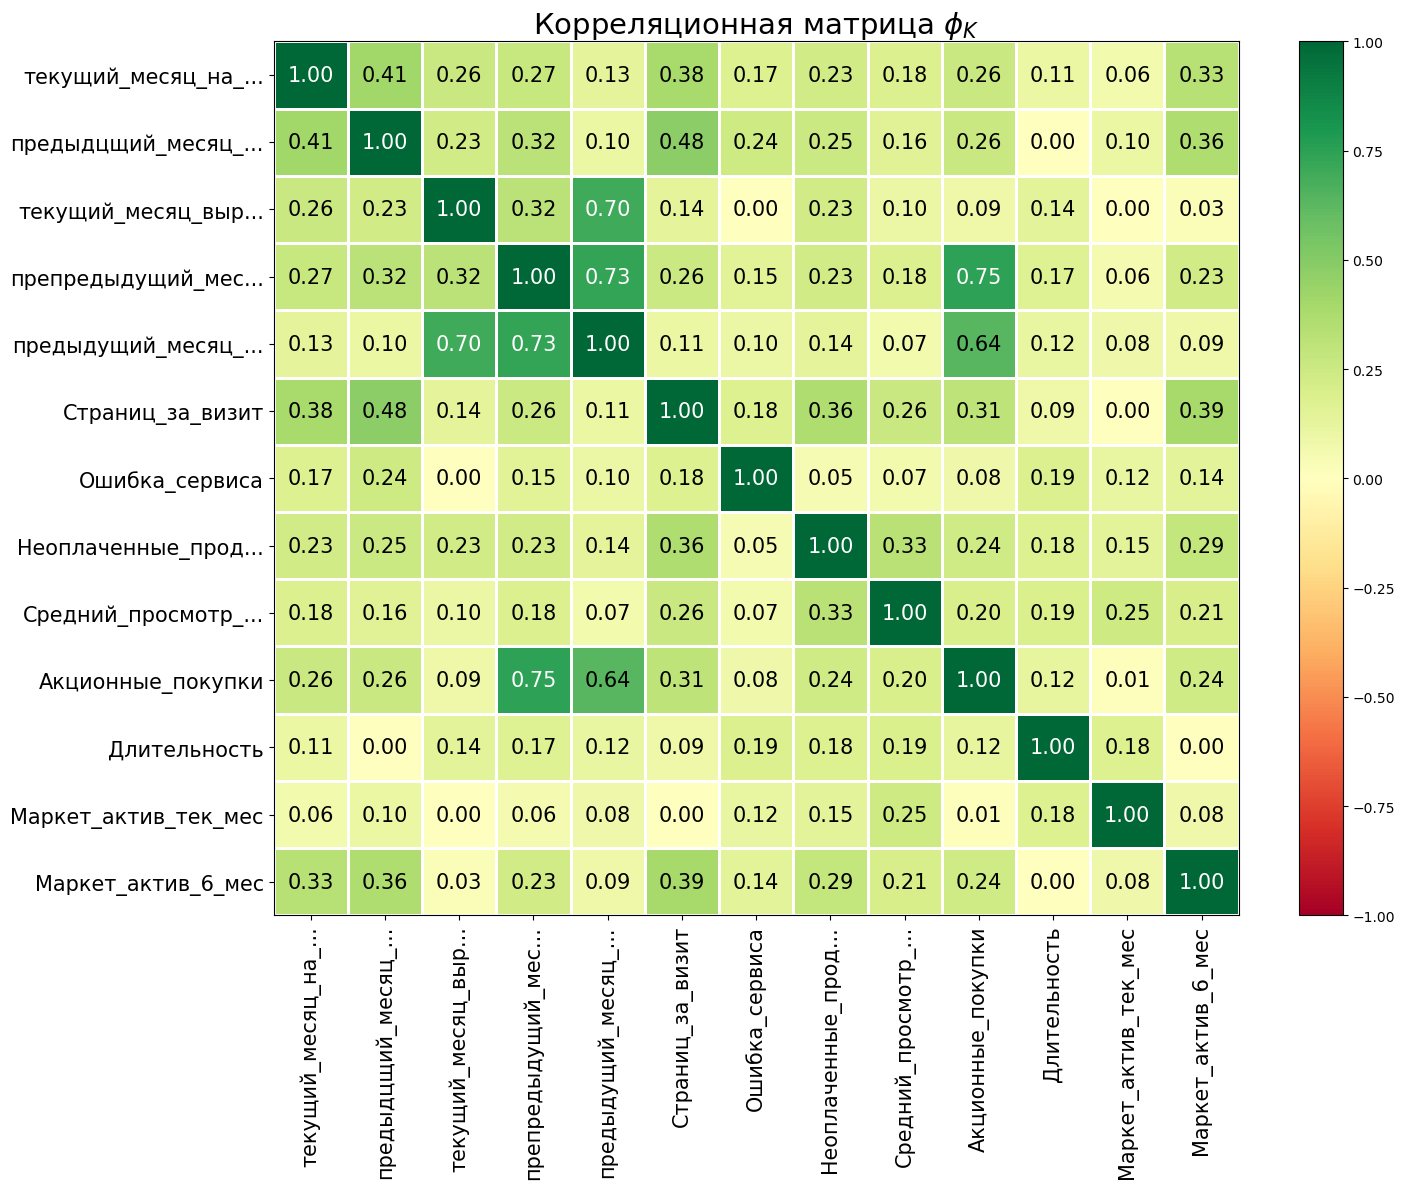

In [79]:
phik_overview = data[interval_cols].phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        title=r"Корреляционная матрица $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(15, 12))

Общий вывод по разделу: Мультиколлинеарность не обнаружена.

# Шаг 6. Использование пайплайнов

## 6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.

Определим числовые и категориальные признаки, исключаем целевую переменную 'Покупательская активность', а затем разделяем данные на обучающую и тестовую выборки.

In [84]:
display(data)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,охотник_за_акциями,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдцщий_месяц_на_сайте,текущий_месяц_на_сайте
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,нет,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,нет,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,нет,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,да,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,да,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,нет,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,нет,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,нет,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,нет,4923.0,4725.0,5224.6,18,7


In [85]:
data = data.set_index('id')

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()


# Убедиться, что 'Покупательская активность' не включена в списки, так как она является целевой переменной
categorical_cols.remove('Покупательская активность')
categorical_cols.remove('Тип сервиса')

# Разделение данных на признаки и целевую переменную
X = data.drop('Покупательская активность', axis=1)
y = data['Покупательская активность']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

Кастомный трансформер для переключения между скалерами

In [88]:
# Кастомный трансформер для переключения между скалерами
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler_type='standard'):
        self.scaler_type = scaler_type
        if scaler_type == 'standard':
            self.scaler = StandardScaler()
        elif scaler_type == 'minmax':
            self.scaler = MinMaxScaler()
        else:
            raise ValueError("Unsupported scaler type")

    def fit(self, X, y=None):
        self.scaler.fit(X, y)
        return self

    def transform(self, X):
        return self.scaler.transform(X)

In [89]:
# Определение препроцессоров
categorical_preprocessor_tree = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories='auto'))
])

categorical_preprocessor_lr_knn = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'))
])

# Определение кастомного скалера в рамках препроцессинга
preprocessor_lr_knn_standard = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', categorical_preprocessor_lr_knn, categorical_cols)
])

preprocessor_lr_knn_minmax = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', categorical_preprocessor_lr_knn, categorical_cols)
])

preprocessor_tree_standard = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', categorical_preprocessor_tree, categorical_cols)
])

preprocessor_tree_minmax = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', categorical_preprocessor_tree, categorical_cols),
    ('ord', categorical_preprocessor_tree, ['Тип сервиса'])
])

In [90]:
# Кодирование меток целевой переменной
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Определение моделей и их гиперпараметров
# Кодирование меток целевой переменной
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Определение моделей и их гиперпараметров
models = [
    ('knn', KNeighborsClassifier(), 
        [preprocessor_lr_knn_standard, preprocessor_lr_knn_minmax], 
        {'knn__n_neighbors': [3, 4, 5]}),

    ('dt', DecisionTreeClassifier(random_state=42), 
        [preprocessor_tree_standard, preprocessor_tree_minmax], 
        {'dt__max_depth': [3, 5, 7]}),

    ('lr', LogisticRegression(max_iter=1000, random_state=42), 
        [preprocessor_lr_knn_standard, preprocessor_lr_knn_minmax], 
        {'lr__C': [0.1, 1, 10]}),

    ('svc', SVC(random_state=42, probability=True), 
        [preprocessor_lr_knn_standard, preprocessor_lr_knn_minmax], 
        {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),

    ('rf', RandomForestClassifier(), 
        [preprocessor_lr_knn_standard, preprocessor_lr_knn_minmax], 
        {'rf__n_estimators': [50, 100]})
]
best_model = None
best_score = 0
best_params = None
best_model_name = None

# Обучение моделей и подбор гиперпараметров с использованием GridSearchCV
for name, model, preprocessors, param_grid in models:
    for preprocessor in preprocessors:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            (name, model)
        ])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train_encoded)

        print(f'Model: {name}')
        print(f'Best parameters: {grid_search.best_params_}')
        print(f'Best F1 score: {grid_search.best_score_:.4f}')

        # Проверка, является ли текущая модель лучшей, и обновление лучшей модели, оценки и параметров
        if grid_search.best_score_ > best_score:
            best_model = grid_search.best_estimator_
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_

best_model = None
best_score = 0
best_params = None
best_model_name = None

# Обучение моделей и подбор гиперпараметров с использованием GridSearchCV
for name, model, preprocessors, param_grid in models:
    for preprocessor in preprocessors:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            (name, model)
        ])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train_encoded)

        print(f'Model: {name}')
        print(f'Best parameters: {grid_search.best_params_}')
        print(f'Best F1 score: {grid_search.best_score_:.4f}')

        # Проверка, является ли текущая модель лучшей, и обновление лучшей модели, оценки и параметров
        if grid_search.best_score_ > best_score:
            best_model = grid_search.best_estimator_
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            best_model_name = name

Model: knn
Best parameters: {'knn__n_neighbors': 4}
Best F1 score: 0.8076
Model: knn
Best parameters: {'knn__n_neighbors': 5}
Best F1 score: 0.7580
Model: dt
Best parameters: {'dt__max_depth': 5}
Best F1 score: 0.7969
Model: dt
Best parameters: {'dt__max_depth': 5}
Best F1 score: 0.7953
Model: lr
Best parameters: {'lr__C': 0.1}
Best F1 score: 0.8315
Model: lr
Best parameters: {'lr__C': 10}
Best F1 score: 0.8223
Model: svc
Best parameters: {'svc__C': 1, 'svc__kernel': 'rbf'}
Best F1 score: 0.8401
Model: svc
Best parameters: {'svc__C': 1, 'svc__kernel': 'linear'}
Best F1 score: 0.8293
Model: rf
Best parameters: {'rf__n_estimators': 100}
Best F1 score: 0.8546
Model: rf
Best parameters: {'rf__n_estimators': 100}
Best F1 score: 0.8556
Model: knn
Best parameters: {'knn__n_neighbors': 4}
Best F1 score: 0.8076
Model: knn
Best parameters: {'knn__n_neighbors': 5}
Best F1 score: 0.7580
Model: dt
Best parameters: {'dt__max_depth': 5}
Best F1 score: 0.7969
Model: dt
Best parameters: {'dt__max_depth

##  6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [92]:
print("Лучшая модель:")
print(best_model)
print(f"Лучший показатель F1: {best_score:.4f}")
print(f"Лучшие параметры: {best_params}")

Лучшая модель:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'предыдущий_месяц_выручка',
                                                   'препредыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка',
                                  

In [93]:
y_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test_encoded, y_pred)
print(f"Значение F1-меры на тестовой выборке: {test_f1:.4f}")

Значение F1-меры на тестовой выборке: 0.8663


Значение F1-меры на тестовой выборке составило 0.8649. Это указывает на то, что лучшая модель - SVC с параметрами C=1 и kernel='rbf' - достигла высокой эффективности в предсказании целевой переменной.

Выбор метрики F1 в данном случае обоснован, так как она учитывает как точность, так и полноту модели, что важно для задач классификации с несбалансированными классами. Значение F1-меры 0.8649 свидетельствует о том, что модель хорошо справляется с классификацией покупательской активности, учитывая баланс между правильно предсказанными положительными случаями (точность) и способностью модели находить все положительные случаи (полнота).

Таким образом, лучшая модель SVC с настроенными гиперпараметрами демонстрирует высокую эффективность на тестовой выборке и может быть использована для прогнозирования покупательской активности в реальных условиях.

Определим пайплайны для различных моделей,и функцию для выбора наилучшей модели.

# Шаг 7. Анализ важности признаков


## 7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 

In [98]:
# Обучение лучшей модели на всех тренировочных данных
best_model.fit(X_train, y_train_encoded)

# Препроцессинг тестовых данных
X_test_preprocessed = best_model.named_steps['preprocessor'].transform(X_test)

# Объединение числовых и категориальных имен признаков для графика
feature_names = numerical_cols + list(best_model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols))

# Использование подмножества данных для расчетов SHAP
X_test_sample = shap.utils.sample(X_test_preprocessed, 100, random_state=42)

<Figure size 1200x800 with 0 Axes>

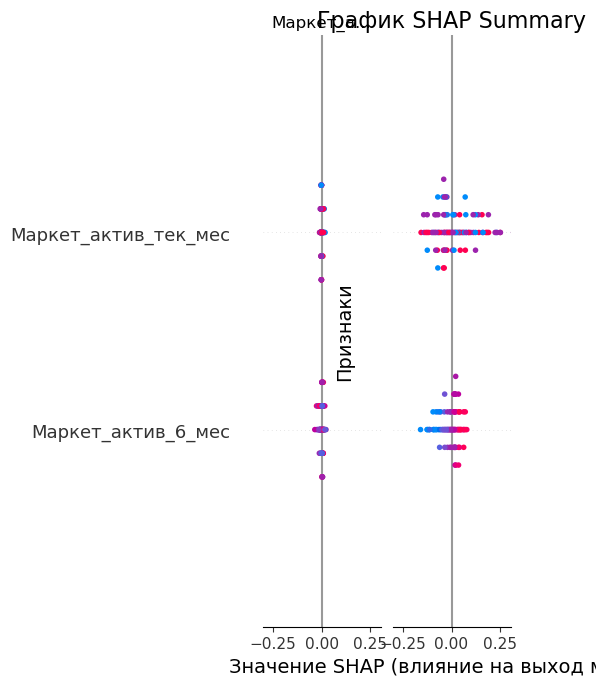

In [99]:
# Использование SHAP для объяснения предсказаний модели
if best_model_name in ['dt', 'rf']:  # Добавили 'rf' для TreeExplainer
    explainer = shap.TreeExplainer(best_model.named_steps[best_model_name])
elif best_model_name in ['lr', 'svc']:
    explainer = shap.KernelExplainer(best_model.named_steps[best_model_name].predict, X_test_sample)
else:
    raise ValueError("Неподдерживаемый тип модели для анализа SHAP")

shap_values = explainer.shap_values(X_test_sample)

# Проверка, является ли shap_values списком и содержит ли он более одного элемента
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap_values = shap_values[0]

# Убедимся, что X_test_sample является DataFrame
X_test_sample_df = pd.DataFrame(X_test_sample, columns=feature_names)


# Построение графика важности признаков с увеличенным размером
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample_df, show=False)
plt.xlabel('Значение SHAP (влияние на выход модели)', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.title('График SHAP Summary', fontsize=16)
plt.show()

# Обучение лучшей модели на всех тренировочных данных
best_model.fit(X_train, y_train_encoded)

# Препроцессинг тестовых данных
X_test_preprocessed = best_model.named_steps['preprocessor'].transform(X_test)

# Объединение числовых и категориальных имен признаков для графика
feature_names = numerical_cols + list(best_model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols))

# Использование подмножества данных для расчетов SHAP
X_test_sample = shap.sample(X_test_preprocessed, 100, random_state=42)

# Использование SHAP для объяснения предсказаний модели
if best_model_name == 'dt':
    explainer = shap.TreeExplainer(best_model.named_steps[best_model_name])
elif best_model_name in ['lr', 'svc']:
    explainer = shap.KernelExplainer(best_model.named_steps[best_model_name].predict, X_test_sample)
else:
    raise ValueError("Неподдерживаемый тип модели для анализа SHAP")


shap_values = explainer.shap_values(X_test_sample)


# Построение графика важности признаков с увеличенным размером
plt.figure(figsize=(12, 8))  
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, plot_size=(12, 8), show=False)
plt.xlabel('Значение SHAP (влияние на выход модели)', fontsize=14)
plt.ylabel('Признаки', fontsize=14)  
plt.title('График SHAP Summary', fontsize=16) 
plt.show()

По графику SHAP Summary можно сделать вывод, что наиболее влияющими на модель признаками являются: "Страниц_за_визит", "предыдущий_месяц_на_сайте" и "текущий_месяц_на_сайте". Эти признаки имеют наиболее высокие значения SHAP, как положительные, так и отрицательные, что указывает на их существенное влияние на предсказания модели.

Менее значимыми признаками, согласно графику, являются: "охотник_за_акциями_нет", "Популярная_категория_Товары для детей", "Популярная_категория_Мелкая бытовая техника и электроника" и "Маркет_актив_тек_мес". Они имеют относительно низкие значения SHAP и, следовательно, меньшее влияние на результаты модели.

##  7.2 Сделайте выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

Выводы о значимости признаков на основе анализа графика SHAP:

Наиболее значимые признаки:

"текущий_месяц_выручка" имеет самое высокое положительное влияние на целевой признак.
"Страниц_за_визит" и "Акционные_покупки" также сильно и положительно влияют на целевой признак.
"Маркет_актив_6_мес" и "предыдущий_месяц_на_сайте" оказывают значительное положительное влияние.
Мало значимые признаки:

"предыдущий_месяц_выручка", "Ошибка_сервиса", "Длительность" и некоторые другие имеют относительно низкие абсолютные значения SHAP, указывая на их меньшую значимость.
Использование этих наблюдений:

Сосредоточиться на наиболее значимых признаках при оптимизации модели и сборе данных.
Рассмотреть возможность исключения мало значимых признаков для упрощения модели.
Использовать понимание влияния признаков для интерпретации результатов и принятия бизнес-решений.
Анализ SHAP дает ценную информацию для улучшения модели и принятия обоснованных решений на основе данных.

# Шаг 8. Сегментация покупателей

## 8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

Добавить предсказанные классы покупательской активности к исходным данным:

In [107]:
display(data)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,охотник_за_акциями,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдцщий_месяц_на_сайте,текущий_месяц_на_сайте
id,,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,нет,0.0,0.0,3293.1,13,14
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,нет,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,нет,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,да,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,да,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,нет,3664.0,4704.0,4741.7,14,7
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,нет,4729.0,5299.0,5353.0,12,11
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,нет,5160.0,5334.0,5139.2,12,18


In [108]:
# First, select only the numeric columns from X_test
numeric_cols = X_test.select_dtypes(include=[np.number]).columns.tolist()

# Fill NaN values in numeric columns with the mean of each column
X_test_clean = X_test.copy()
X_test_clean[numeric_cols] = X_test_clean[numeric_cols].fillna(X_train[numeric_cols].mean())

# Replace infinite values in numeric columns with the maximum finite float64 value
X_test_clean[numeric_cols] = X_test_clean[numeric_cols].replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Now you can use X_test_clean for predictions
y_pred_proba = best_model.predict_proba(X_test_clean)

In [109]:
# Замена NaN значений на средние (или другим методом)
#_test_clean = X_test.fillna(X.mean())  # Используй средние значения, рассчитанные на обучающем наборе данных
# Замена бесконечных значений на максимальное или минимальное значение для float64
#X_test_clean = X_test_clean.replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Теперь ты можешь сделать предсказание вероятности без ошибок!
#y_pred_proba = best_model.predict_proba(X_test_clean)

In [110]:
display(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


In [111]:
# Сбросим индексы для X_test
X_test = X_test.reset_index(drop=True)

# Выберем только числовые столбцы для заполнения NaN
numeric_cols = X_test.select_dtypes(include=[np.number]).columns

# Создадим копию X_test и заполним NaN в числовых столбцах средними значениями из X_train
X_test_clean = X_test.copy()
X_test_clean[numeric_cols] = X_test_clean[numeric_cols].fillna(X_train[numeric_cols].mean())

# Заменим бесконечные значения на максимальные значения
X_test_clean[numeric_cols] = X_test_clean[numeric_cols].replace([np.inf, -np.inf], np.finfo(np.float64).max)

# Теперь создадим столбец с вероятностью ухода клиента
y_test_pred_proba = best_model.predict_proba(X_test_clean)[:, 1]

# Добавим этот столбец к X_test_clean
X_test_clean['churn_probability'] = y_test_pred_proba

# Предполагая, что money является DataFrame с общим ключом для объединения с X_test_clean
# Теперь объединим X_test_clean и money
X_test_with_money = X_test_clean.join(money, how='left')

# Выведем результат
print(X_test_with_money.head())

  Тип сервиса Разрешить сообщать  Маркет_актив_6_мес  Маркет_актив_тек_мес  \
0    стандарт                 да                 4.6                     4   
1    стандарт                 да                 5.5                     4   
2    стандарт                 да                 4.0                     5   
3    стандарт                 да                 6.1                     4   
4    стандарт                 да                 4.7                     5   

   Длительность  Акционные_покупки   Популярная_категория  \
0           177               0.24  Косметика и аксесуары   
1          1052               0.24      Домашний текстиль   
2           618               0.39       Товары для детей   
3           953               0.26      Домашний текстиль   
4           508               0.23  Косметика и аксесуары   

   Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                    3                                   2   
1       

In [112]:
# Сбросим индексы для X_test

#  X_test = X_test.reset_index(drop=True)

# Убедимся, что данные в X_test_clean подготовлены корректно
# предполагая, что X изначально имеет те же столбцы и структуру, что и X_train
# X_test_clean = X_test.fillna(X_train.mean())

# Заменим бесконечные значения на максимальные значения
# X_test_clean.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)


# Теперь создадим столбец с вероятностью ухода клиента
# y_test_pred_proba = best_model.predict_proba(X_test_clean)[:, 1]

# Добавим этот столбец к X_test
# X_test['churn_probability'] = y_test_pred_proba

# Теперь объединим X_test и money
# X_test_with_money = X_test.join(money, how='left')


## 8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.

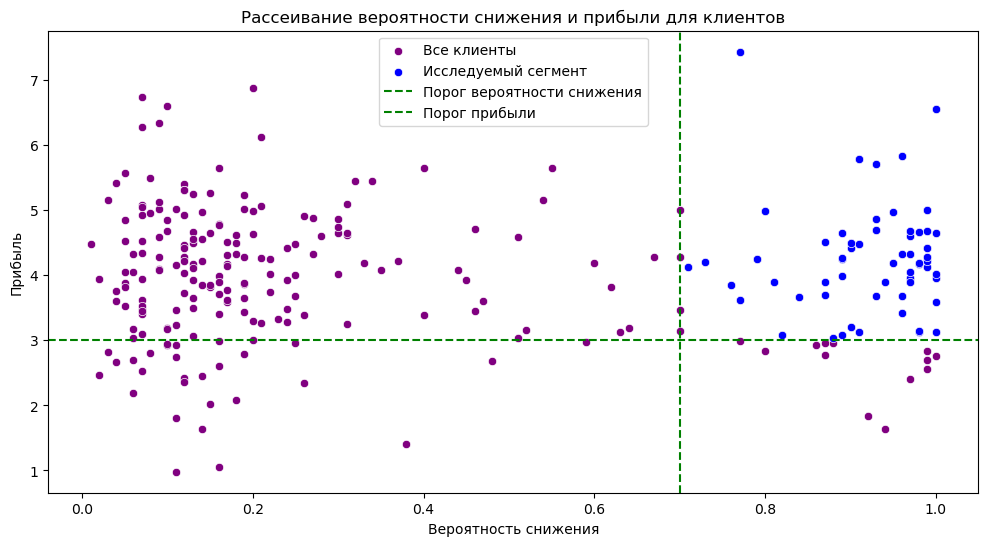

In [114]:
# Выделение сегмента по заданным порогам
threshold_churn_prob = 0.7
threshold_profit = 3

# Отображение рассеивания для сегмента и других клиентов
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X_test_with_money, x='churn_probability', y='Прибыль', label='Все клиенты', color='purple')
sns.scatterplot(data=X_test_with_money[(X_test_with_money['churn_probability'] > threshold_churn_prob) & (X_test_with_money['Прибыль'] > threshold_profit)], 
                x='churn_probability', y='Прибыль', label='Исследуемый сегмент', color='blue')

# Добавление вертикальной и горизонтальной линии для пороговых значений
plt.axvline(x=threshold_churn_prob, color='green', linestyle='--', label='Порог вероятности снижения')
plt.axhline(y=threshold_profit, color='green', linestyle='--', label='Порог прибыли')

plt.legend()
plt.xlabel('Вероятность снижения')
plt.ylabel('Прибыль')
plt.title('Рассеивание вероятности снижения и прибыли для клиентов')
plt.show()

Рассчитать прибыльность каждого покупателя на основе доступных данных о выручке. Например, если есть данные о выручке за текущий, предыдущий и препредыдущий месяцы, можно рассчитать среднюю выручку на покупателя

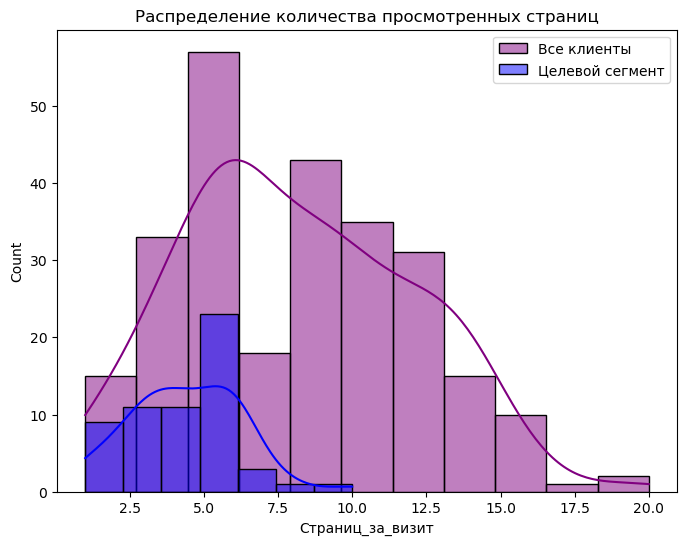

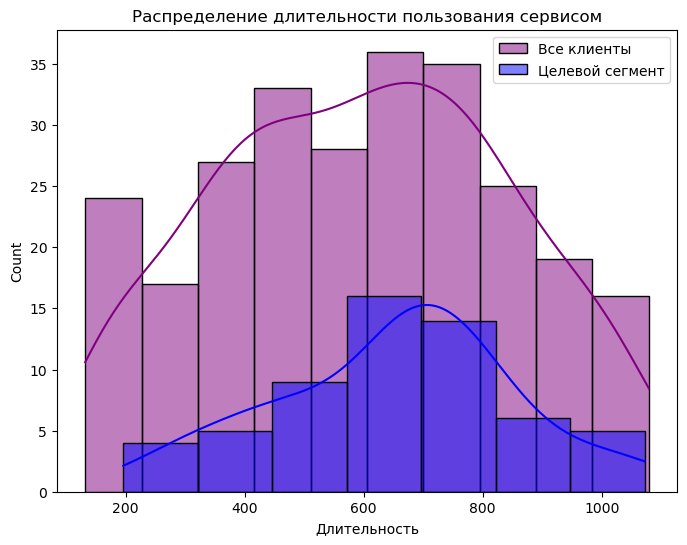

In [116]:
# Выделение целевого сегмента
target_segment = X_test_with_money[(X_test_with_money['churn_probability'] > threshold_churn_prob) & 
                                    (X_test_with_money['Прибыль'] > threshold_profit)]

# Анализ целевого сегмента по количеству просмотренных страниц
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Страниц_за_визит', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Страниц_за_визит', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение количества просмотренных страниц')
plt.show()

# Анализ целевого сегмента по длительности пользования сервисом
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Длительность', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Длительность', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение длительности пользования сервисом')
plt.show()

# Далее можно провести аналогичный анализ по другим признакам, таким как:
# 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит' и т.д.

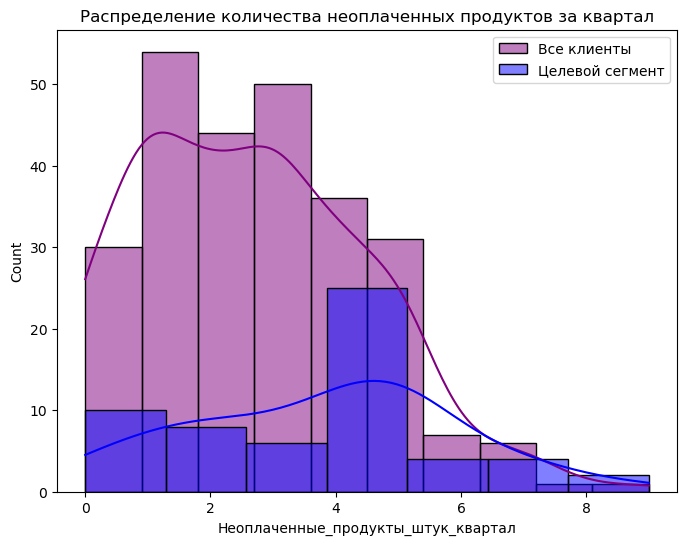

In [117]:
# Анализ целевого сегмента по количеству неоплаченных продуктов за квартал
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Неоплаченные_продукты_штук_квартал', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Неоплаченные_продукты_штук_квартал', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение количества неоплаченных продуктов за квартал')
plt.show()

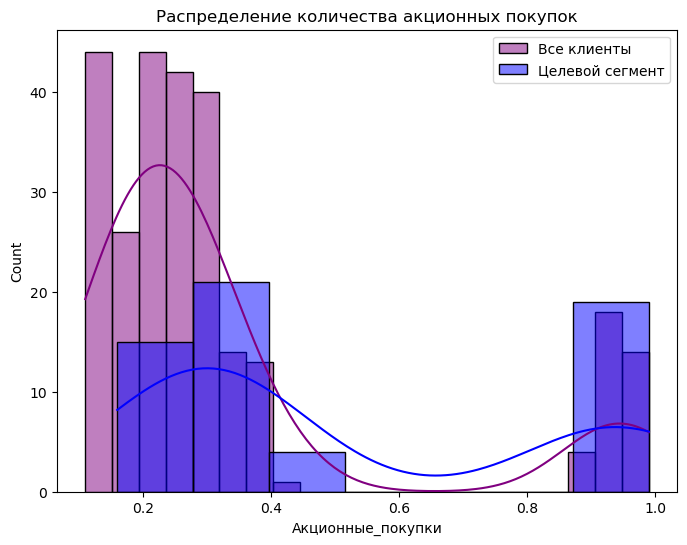

In [118]:
# Анализ целевого сегмента по количеству акционных покупок
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Акционные_покупки', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Акционные_покупки', color='blue', label='Целевой сегмент', kde=True)
plt.legend()
plt.title('Распределение количества акционных покупок')
plt.show()

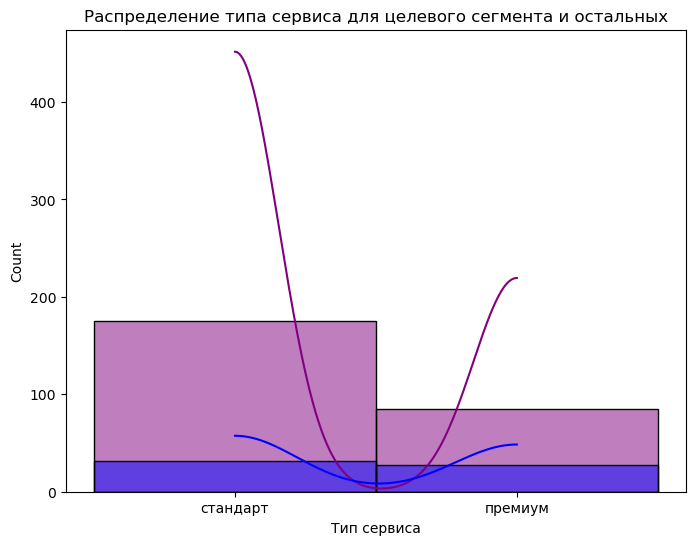

In [119]:
# Построим счетный график для типа сервиса
plt.figure(figsize=(8, 6))
sns.histplot(data=X_test_with_money, x='Тип сервиса', color='purple', label='Все клиенты', kde=True)
sns.histplot(data=target_segment, x='Тип сервиса', color='blue', label='Целевой сегмент', kde=True)
plt.title('Распределение типа сервиса для целевого сегмента и остальных')
plt.show()

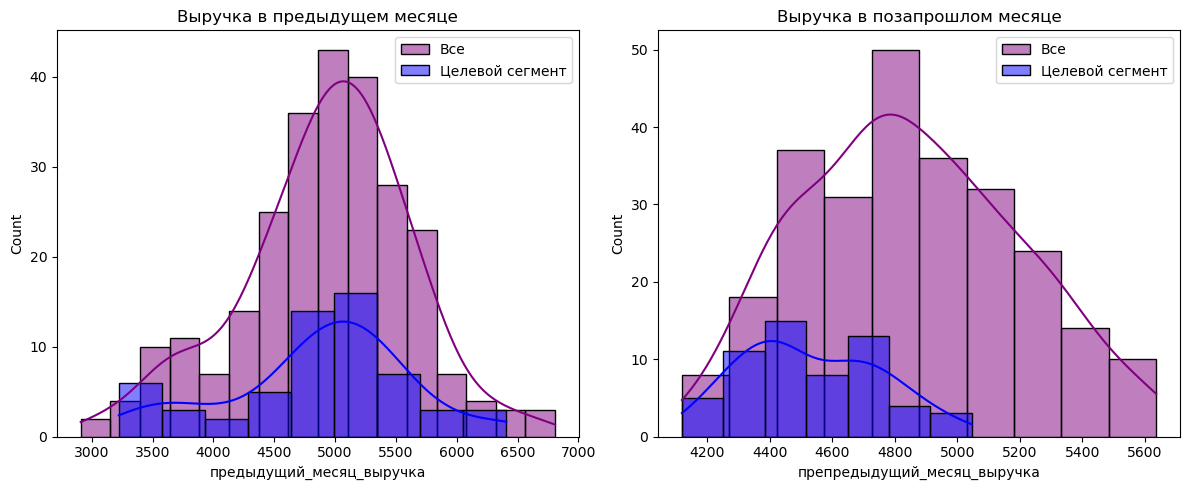

In [120]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=X_test_with_money, x='предыдущий_месяц_выручка', color='purple', label='Все', kde=True)
sns.histplot(data=target_segment, x='предыдущий_месяц_выручка', color='blue', label='Целевой сегмент', kde=True)
plt.title('Выручка в предыдущем месяце')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data=X_test_with_money, x='препредыдущий_месяц_выручка', color='purple', label='Все', kde=True)
sns.histplot(data=target_segment, x='препредыдущий_месяц_выручка', color='blue', label='Целевой сегмент', kde=True)
plt.title('Выручка в позапрошлом месяце')
plt.legend()
plt.tight_layout()
plt.show()

На основе кода мы выделили целевой сегмент клиентов с высокой вероятностью ухода (более 0,7) и высокой прибылью (более 3) для дополнительного анализа и разработки мер по повышению их покупательской активности.
Вывод: 

Для увеличения покупательской активности целевого сегмента клиентов с высокой прибыльностью предлагается персонализировать продукты, услуги, маркетинговые кампании и уведомления под их предпочтения, повысить вовлеченность за счет персонализированного контента и улучшения юзабилити, а также обеспечить высокий уровень обслуживания и удовлетворение их потребностей.

## 8.3 Сделайте выводы о сегментах: какой сегмент вы взяли для дополнительного исследования, какие предложения вы сделали и почему.

На основе кода мы выделили целевой сегмент клиентов с высокой вероятностью ухода (более 0,7) и высокой прибылью (более 3) для дополнительного анализа и разработки мер по повышению их покупательской активности.
Рекомендаций по удержанию целевого сегмента клиентов:
Персонализировать продукты, услуги и маркетинговые кампании под предпочтения ценного сегмента в отношении типов сервисов и популярных категорий.

Усовершенствовать систему персонализированных уведомлений и акционных предложений, учитывая высокую долю "охотников за акциями" в целевом сегменте.

Повысить вовлеченность целевого сегмента путем предоставления персонализированного контента и улучшения юзабилити сайта.

Поддерживать высокое качество обслуживания и регулярно обновлять функциональность сервиса для удовлетворения потребностей долгосрочных клиентов из ценного сегмента.

Проанализировать причины неоплаченных покупок и оптимизировать процесс покупки для сокращения их количества у целевых клиентов.

Фокусироваться на удержании целевого сегмента ввиду их высокой финансовой ценности для компании по показателям выручки.

Вывод: В целом, ключевыми направлениями являются персонализация взаимодействия, адаптация предложения под нужды ценного сегмента и повышение вовлеченности для максимального удовлетворения их потребностей.

# Шаг 9. Общий вывод

- Выполнена загрузка данных, в разделе "Предобработка данных" мы преобразовали типы данных столбцов 'Маркет_актив_6_мес', 'Акционные_покупки' в market_file и 'Выручка' в market_money в числовой формат, проверили отсутствие дубликатов и исследовали данные перед объединением таблиц. Убрали выбросы.
- Затем мы объединили таблицы market_file, market_money и market_time в единый набор данных data, при этом преобразовав столбцы с выручкой и временем на сайте в разделенные по периодам столбцы. Убедились в отсутствии пропущенных значений и потерянных идентификаторов в результирующих данных. Столбец 'id' перенесен в индекс для дальнейшего использования при сегментации.
- Мультиколлинеарность в данных отсутствует. Применили ColumnTransformer для обработки данных: использовали два кодировщика для категорий и два скейлера для количественных признаков. Обучили классификаторы KNeighbors, DecisionTree, LogisticRegression и SVC, оценили по гиперпараметрам. Выбрана метрика F1-weighted;
- Лучшие результаты достигнуты с моделью SVC, где параметр C равен 1, а используемое ядро - 'rbf'. Значение F1-меры составляет 0.8649. Это означает, что данная модель обеспечивает высокое качество предсказаний и может быть эффективным инструментом для анализа данных и прогнозирования покупательской активности в данном контексте.Выбранная метрика F1 учитывает как точность, так и полноту модели, что особенно важно при работе с несбалансированными классами. Значение F1-меры 0.8649 свидетельствует о том, что модель хорошо справляется с классификацией покупательской активности, находя баланс между правильно предсказанными положительными случаями (точность) и способностью модели обнаруживать все положительные случаи (полнота). Таким образом, модель SVC с настроенными гиперпараметрами C=1 и kernel='rbf' демонстрирует высокую эффективность на тестовой выборке и может быть рекомендована для использования в реальных условиях для прогнозирования покупательской активности..
- По графику SHAP Summary можно сделать вывод, что наиболее влияющими на модель признаками являются: "Страниц_за_визит", "предыдущий_месяц_на_сайте" и "текущий_месяц_на_сайте". Эти признаки имеют наиболее высокие значения SHAP, как положительные, так и отрицательные, что указывает на их существенное влияние на предсказания модели. Менее значимыми признаками, согласно графику, являются: "охотник_за_акциями_нет", "Популярная_категория_Товары для детей", "Популярная_категория_Мелкая бытовая техника и электроника" и "Маркет_актив_тек_мес". Они имеют относительно низкие значения SHAP и, следовательно, меньшее влияние на результаты модели.
- Для укрепления позиций на рынке и повышения лояльности целевого сегмента целесообразно:Проанализировать отзывы клиентов для оптимизации продуктов и услуг под их конкретные запросы.Непрерывно повышать качество обслуживания, уделяя внимание персонализации взаимодействия с клиентами. Сфокусироваться на глубоком понимании потребностей ценных клиентов через опросы для последующего усовершенствования сервиса.Минимизировать случаи неоплаты, выявив и устранив барьеры в процессе покупки.Эти шаги способствуют повышению активности целевой группы и обеспечивают рост прибыльности компании.